#自行选择两个数据集进行探索性分析
##分析报告一
###一、数据
####1.1 数据集选择
    Wine Reviews：winemag-data_first150k.csv
    Wine Reviews: winemag-data-130k-v2.csv(用于对比数据缺失处理的原始数据集使用)
####1.2 编程语言：python

####1.3 导入所需各类依赖包

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

###二、数据分析要求
####2.1 数据可视化及摘要
\* 数据摘要
<p>2.1.1 标称属性，给出每个可能取值的频数
    <p>该数据集中标称属性有：country、disignation、province、region_1、region_2、variety、winery
    <p>由于属性值较多，这里我们以country为例作展示，其余标称属性可能取值的频数运行代码后可查看
    <p>** Name: country, dtype: int64 **

In [ ]:
wine = pd.DataFrame(pd.read_csv('winemag-data_first150k.csv'))
print(wine['country'].value_counts())

| country      |               频数|     | country      |               频数|
| :-----: | :-----: |                   | :-----: | :-----: |
| US           |             62397|     | Lebanon      |                37|
| Italy        |             23478|     | Cyprus       |                31|
| France       |             21098|     | Brazil       |                25|
| Spain        |              8268|     | Macedonia    |                16|
| Chile        |              5816|     | Serbia       |                14|
| Argentina    |              5631|     | Morocco      |                12|
| Portugal     |              5322|     | England      |                 9|
| Australia    |              4957|     | Luxembourg   |                 9|
| New Zealand  |              3320|     | Lithuania    |                 8|
| Austria      |              3057|     | India        |                 8|
| Germany      |              2452|     | Czech Republic|                6|
| South Africa |              2258|     | Ukraine      |                 5|
| Greece       |               884|     | Switzerland  |                 4|
| Israel       |               630|     | Bosnia and Herzegovina|        4|
| Hungary      |               231|     | South Korea  |                 4|
| Canada       |               196|     | Egypt       |                  3|
| Romania      |               139|     | China       |                  3|
| Slovenia     |                94|     | Slovakia    |                  3|
| Uruguay      |                92|     | Albania     |                  2|
| Croatia      |                89|     | Montenegro  |                  2|
| Bulgaria     |                77|     | Tunisia     |                  2|
| Moldova      |                71|     | Japan       |                  2|
| Mexico       |                63|     | US-France   |                  1|
| Turkey       |                52|
| Georgia      |                43|

<p>** country属性直方图 **

In [ ]:
#country属性直方图
plt.hist(x=wine['country'].dropna(), bins=50, edgecolor='black')
# 添加x轴和y轴标签
plt.xlabel('country')
plt.ylabel('frequency')
# 添加标题
plt.title('Wine-Country distribution')
plt.xticks(rotation=90)
plt.tick_params(labelsize=6)
plt.savefig('./wineResult/country_distribution_hist.png')
plt.show()

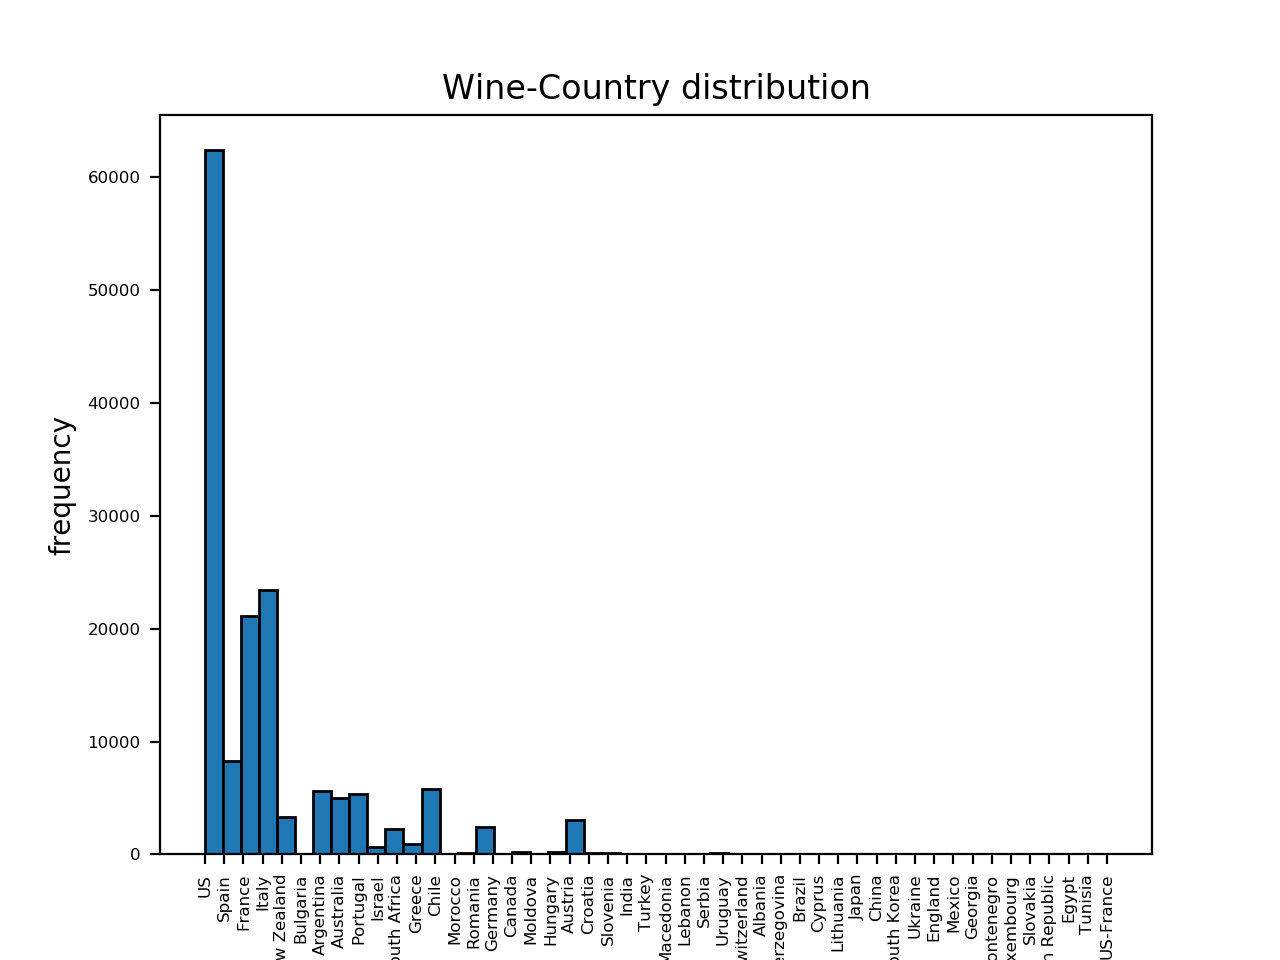

In [27]:
from IPython.display import Image
Image(filename = 'country_distribution_hist.png', width=500, height=500)

<p>2.1.2 数值属性，给出数值属性的五数概括及缺失值的个数
    <p>该数据集中数值属性有：price、points
    <p>** Name: price, dtype: float64**

In [ ]:
wine = pd.DataFrame(pd.read_csv('winemag-data_first150k.csv'))
print(wine['price'].describe())

| price      |               |
| :-----: | :-----: |                  
| count      |    137235.0000|     
| mean       |        33.1315|
| std        |        36.3225|
| min        |         4.0000|
| 25%        |        16.0000|
| 50%        |        24.0000|
| 75%        |        40.0000|
| max        |      2300.0000|

<p>** Name: points, dtype: float64**

In [ ]:
wine = pd.DataFrame(pd.read_csv('winemag-data_first150k.csv'))
print(wine['points'].describe())

| points      |               |
| :-----: | :-----: |                  
| count      |    150930.0000|     
| mean       |        87.8884|
| std        |         3.2224|
| min        |        80.0000|
| 25%        |        86.0000|
| 50%        |        88.0000|
| 75%        |        90.0000|
| max        |       100.0000|

<p>该数据集的缺省值情况为 

In [ ]:
print(wine.isna().sum())

| 缺失值      |               |
| :-----: | :-----: |                  
| country    |    5|     
| description|    0|
| designation|45735|
| points     |    0|
| price      |13695|
| province   |    5|
| region_1   |25060|
| region_2   |89977|
| variety    |    0|
| winery     |    0|

\* 数据可视化
<p>2.1.3 使用直方图、盒图等检查数据分布及离群点 
<p>（这里给出price和points属性的可视化展示）
<p>(1)、** price属性直方图 **

In [ ]:
#price属性直方图
plt.hist(x=wine['price'], bins=100, edgecolor='black')
# 添加x轴和y轴标签
plt.xlabel('price')
plt.ylabel('frequency')
# 添加标题
plt.title('Wine-Price distribution')
plt.savefig('./wineResult/price_distribution_hist.png')
plt.show()

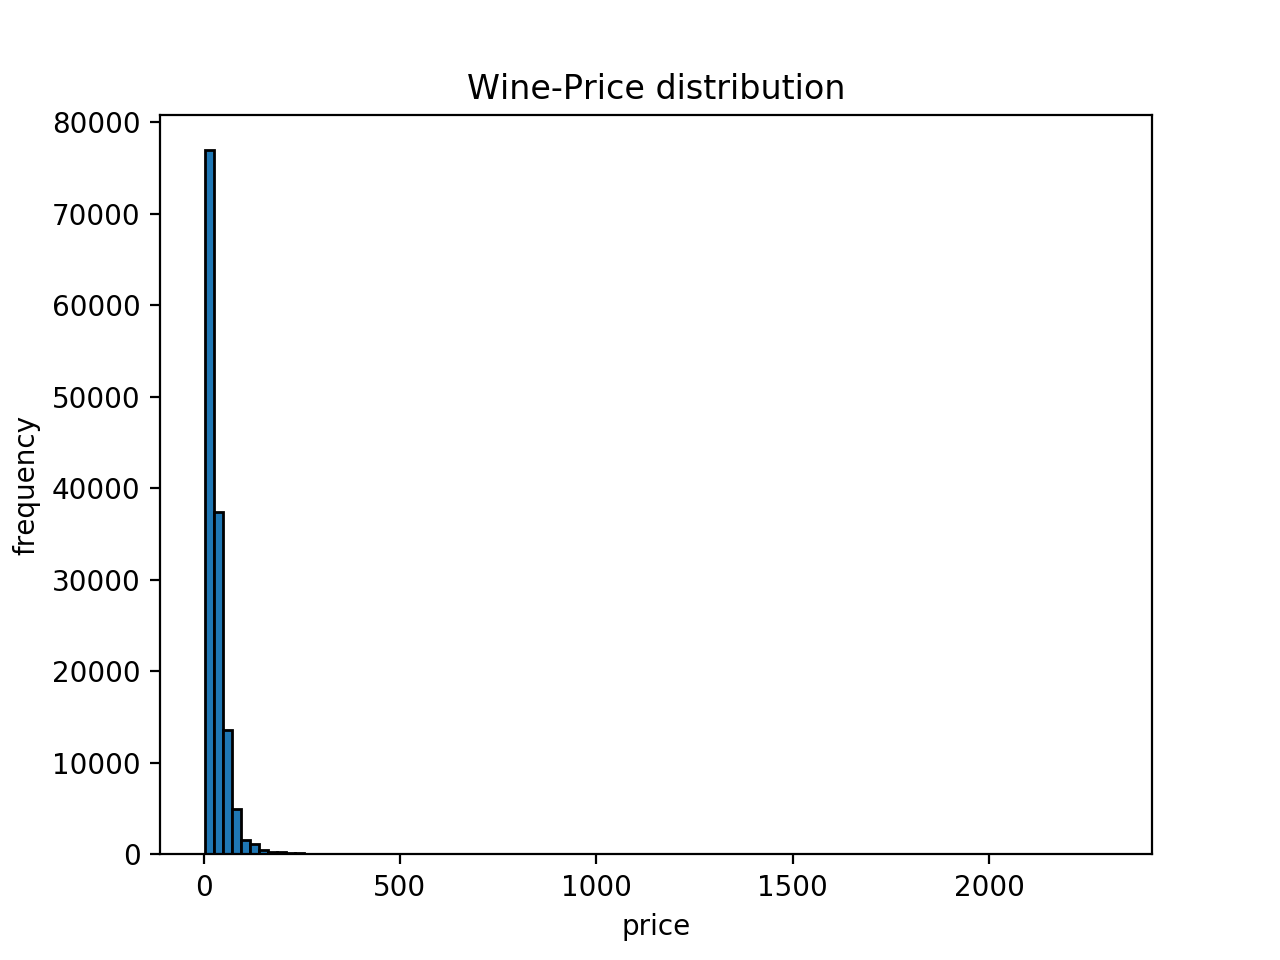

In [11]:
from IPython.display import Image
Image(filename = 'price_distribution_hist.png', width=500, height=500)

<p>** price属性盒图 **

In [ ]:
#price属性盒图(不丢弃缺失值情况)
priceNa = pd.DataFrame(pd.read_csv('winemag-data_first150k.csv').price)
priceNa.boxplot(sym='o')
plt.boxplot(wine['price'], sym='o')
plt.ylabel('price')
plt.title('Wine-Price Boxplot')
#plt.legend()
plt.savefig('./wineResult/price_box.png')
plt.show()

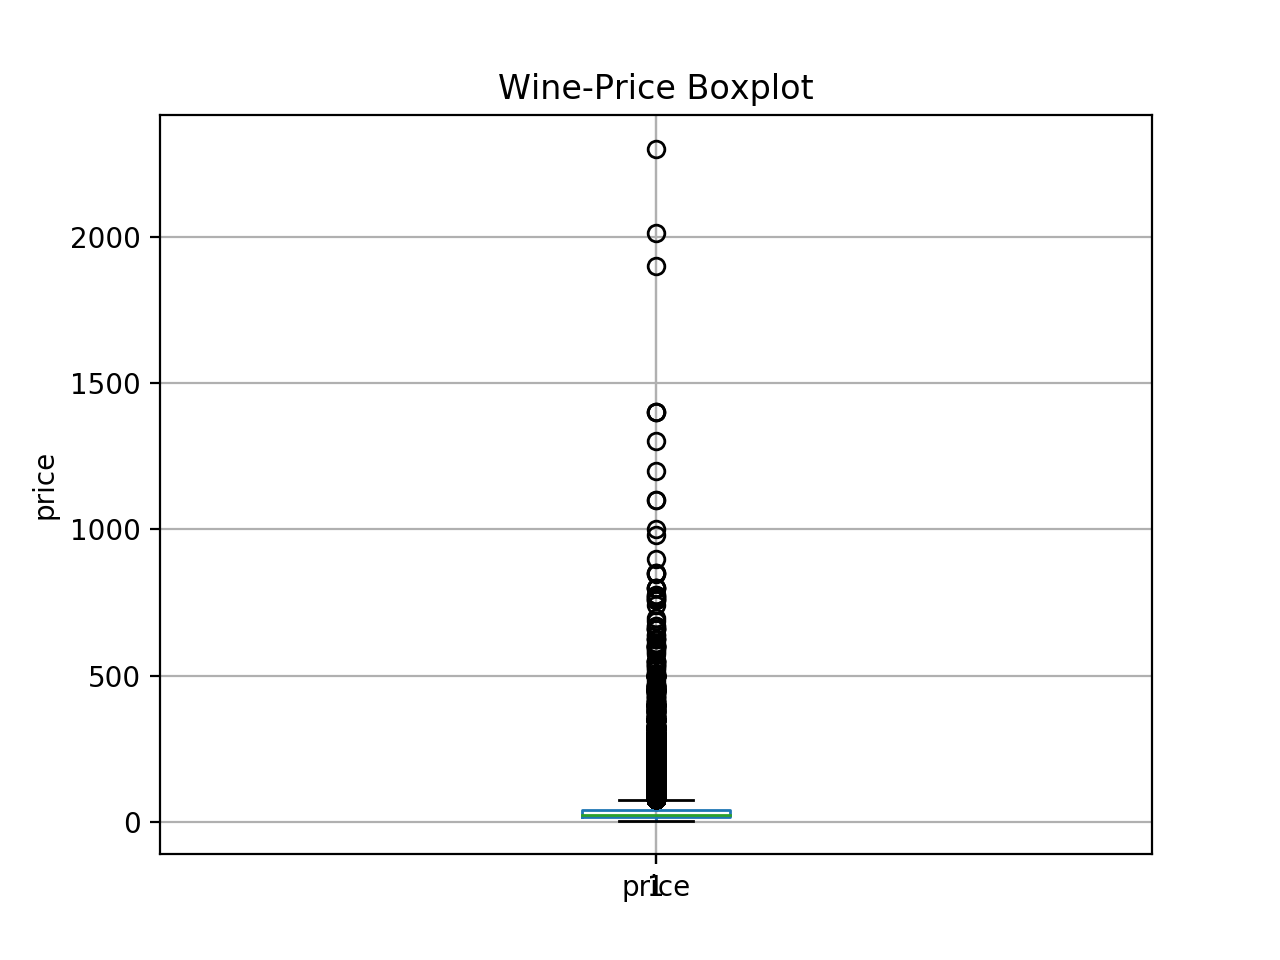

In [8]:
from IPython.display import Image
Image(filename = 'price_box.png', width=500, height=500)

<p>** price属性Q-Q图 **

In [ ]:
#price属性QQ图(不丢弃缺失值)
sorted_ = np.sort(wine['price'])
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(wine['price'], dist="norm", plot=plt)
plt.savefig('./wineResult/price_qq.png')
plt.show()

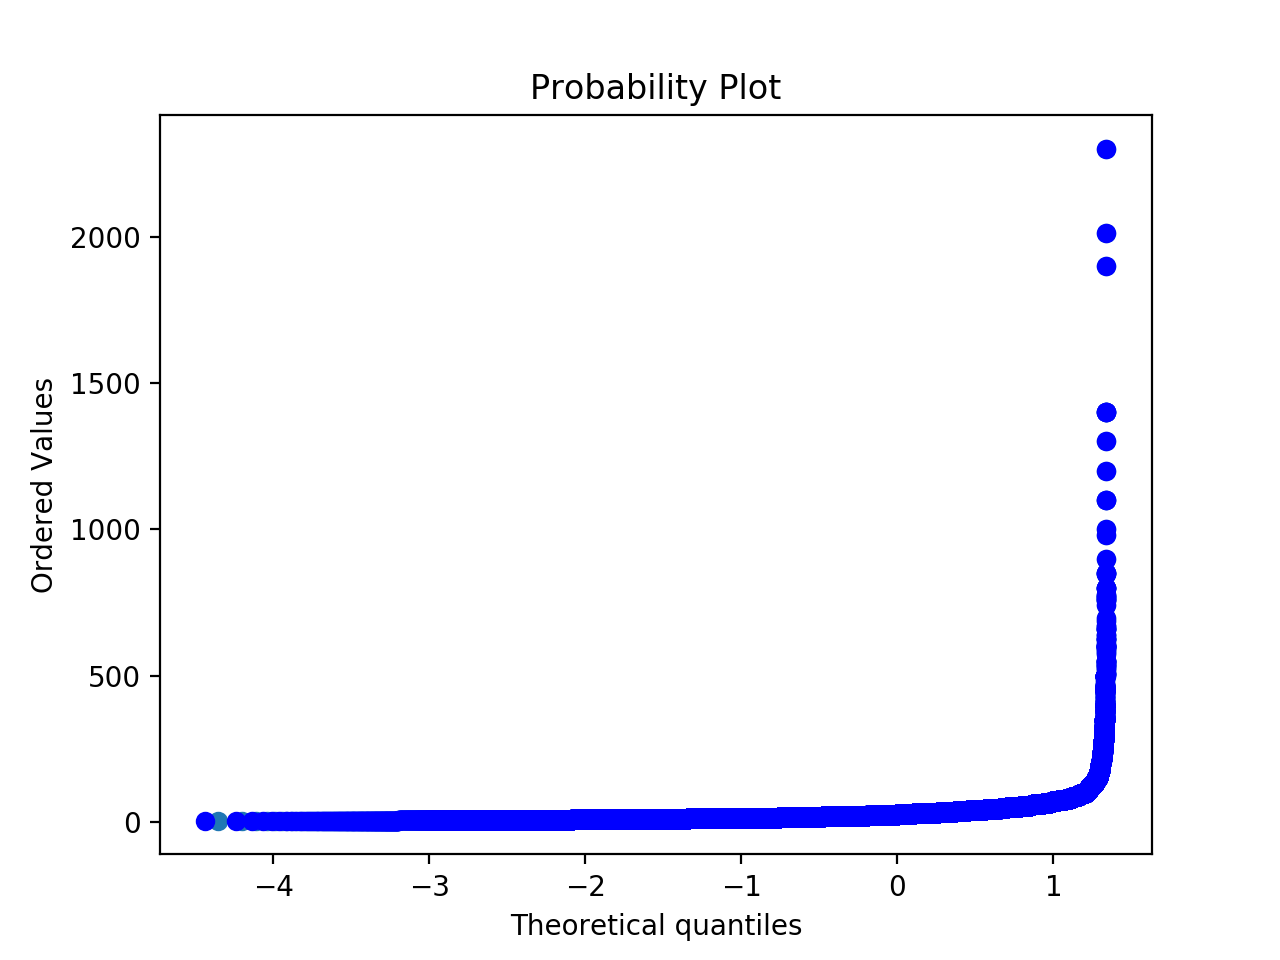

In [7]:
from IPython.display import Image
Image(filename = 'price_qq.png', width=500, height=500)

<p>(2)、** points属性直方图 **

In [ ]:
#points属性直方图
plt.hist(x=wine['points'], bins=100, edgecolor='black')
# 添加x轴和y轴标签
plt.xlabel('points')
plt.ylabel('frequency')
# 添加标题
plt.title('Wine-Points distribution')
plt.savefig('./wineResult/points_distribution_hist.png')
plt.show()

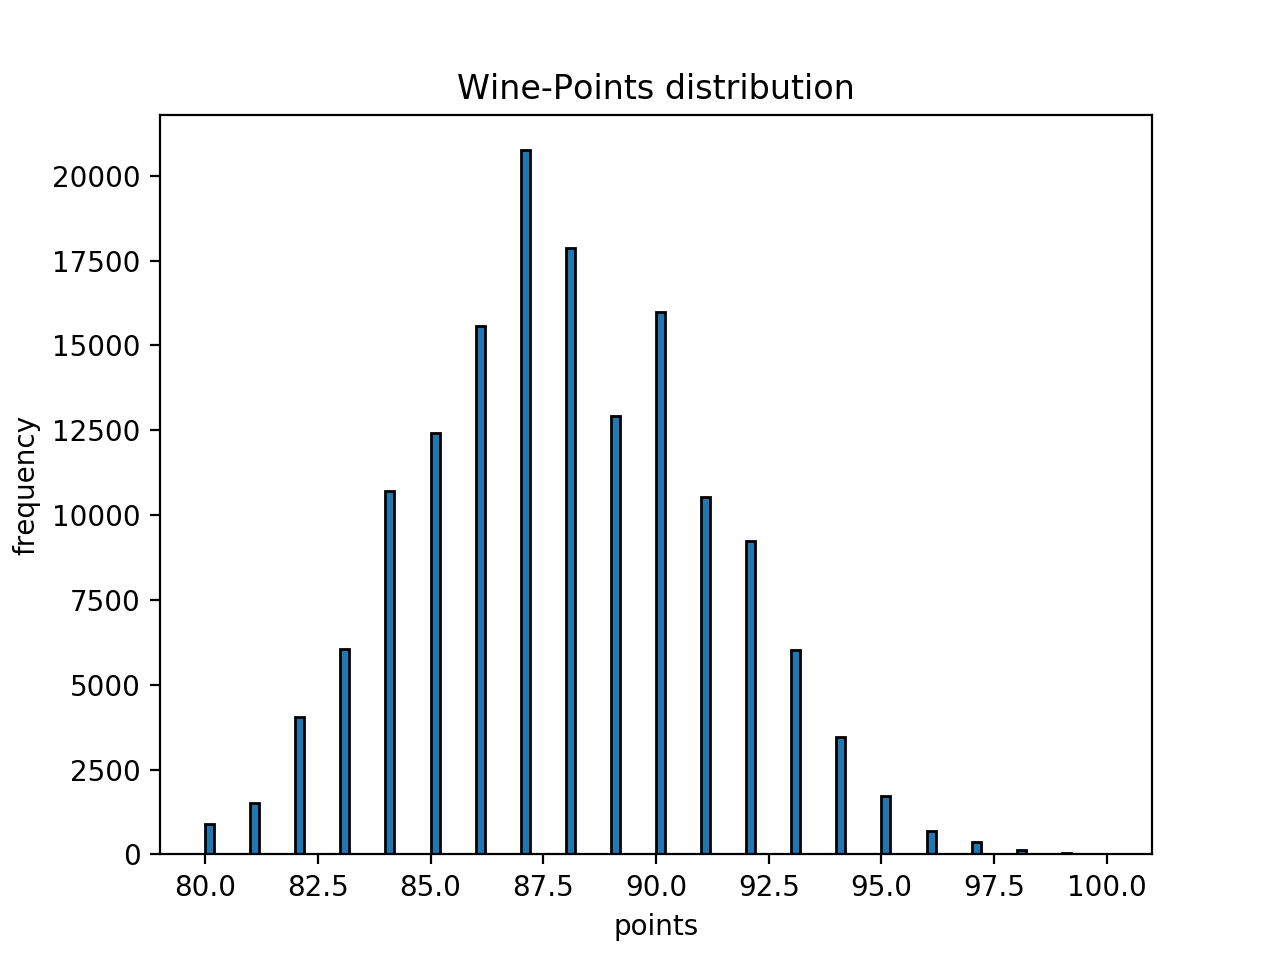

In [6]:
from IPython.display import Image
Image(filename = 'points_distribution_hist.png', width=500, height=500)

<p>** points属性盒图 **

In [ ]:
#points属性盒图(不丢弃缺失值情况)
priceNa = pd.DataFrame(pd.read_csv('winemag-data_first150k.csv').points)
priceNa.boxplot(sym='o')
plt.ylabel('points')
plt.title('Wine-Points Boxplot')
plt.savefig('./wineResult/points_box.png')
plt.show()

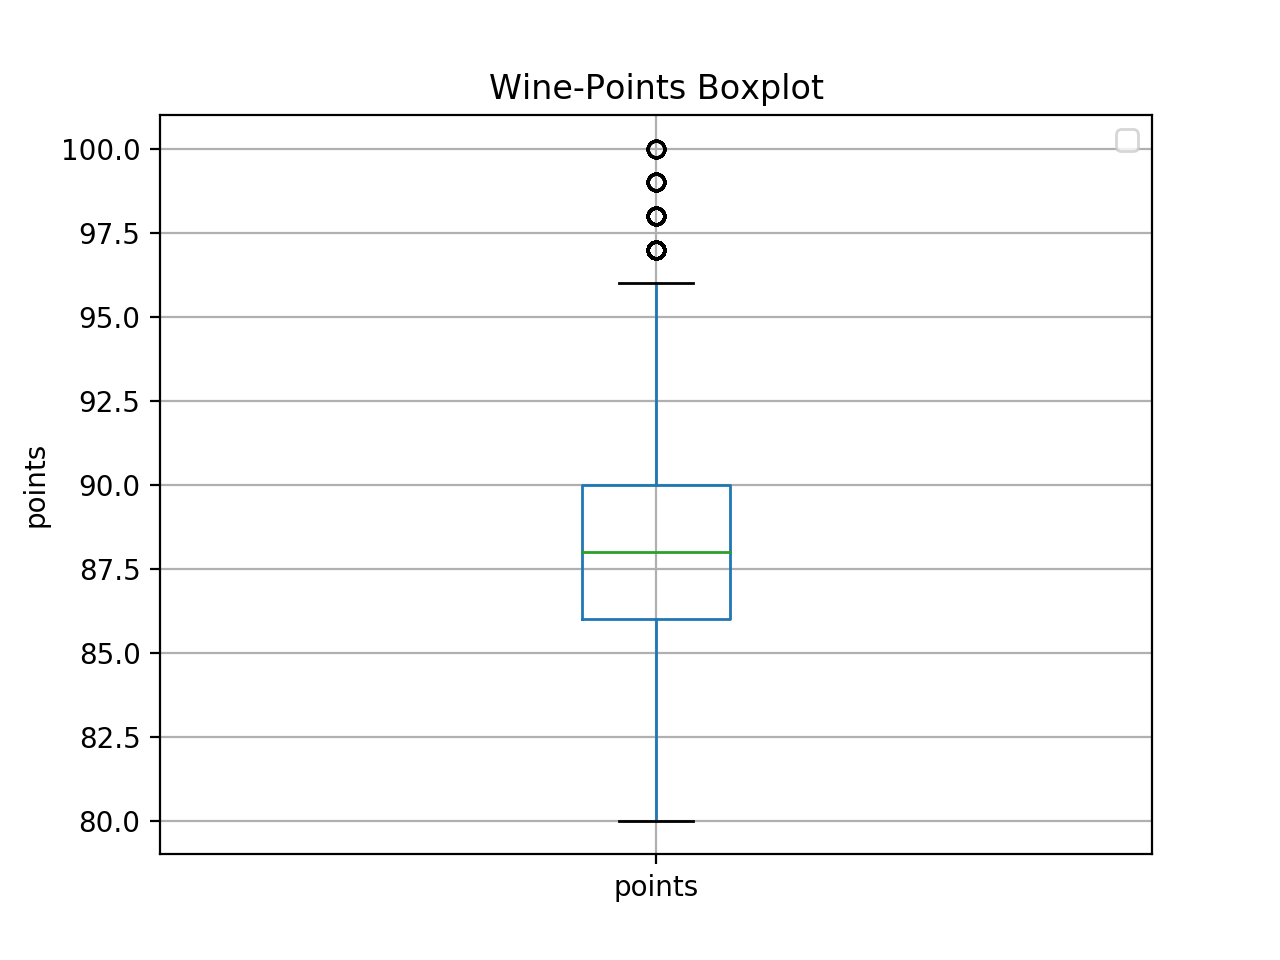

In [5]:
from IPython.display import Image
Image(filename = 'points_box.png', width=500, height=500)

In [ ]:
#points属性QQ图(不丢弃缺失值)
sorted_ = np.sort(wine['points'])
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(wine['points'], dist="norm", plot=plt)
plt.savefig('./wineResult/points_qq.png')
plt.show()

<p>** points属性Q-Q图 **

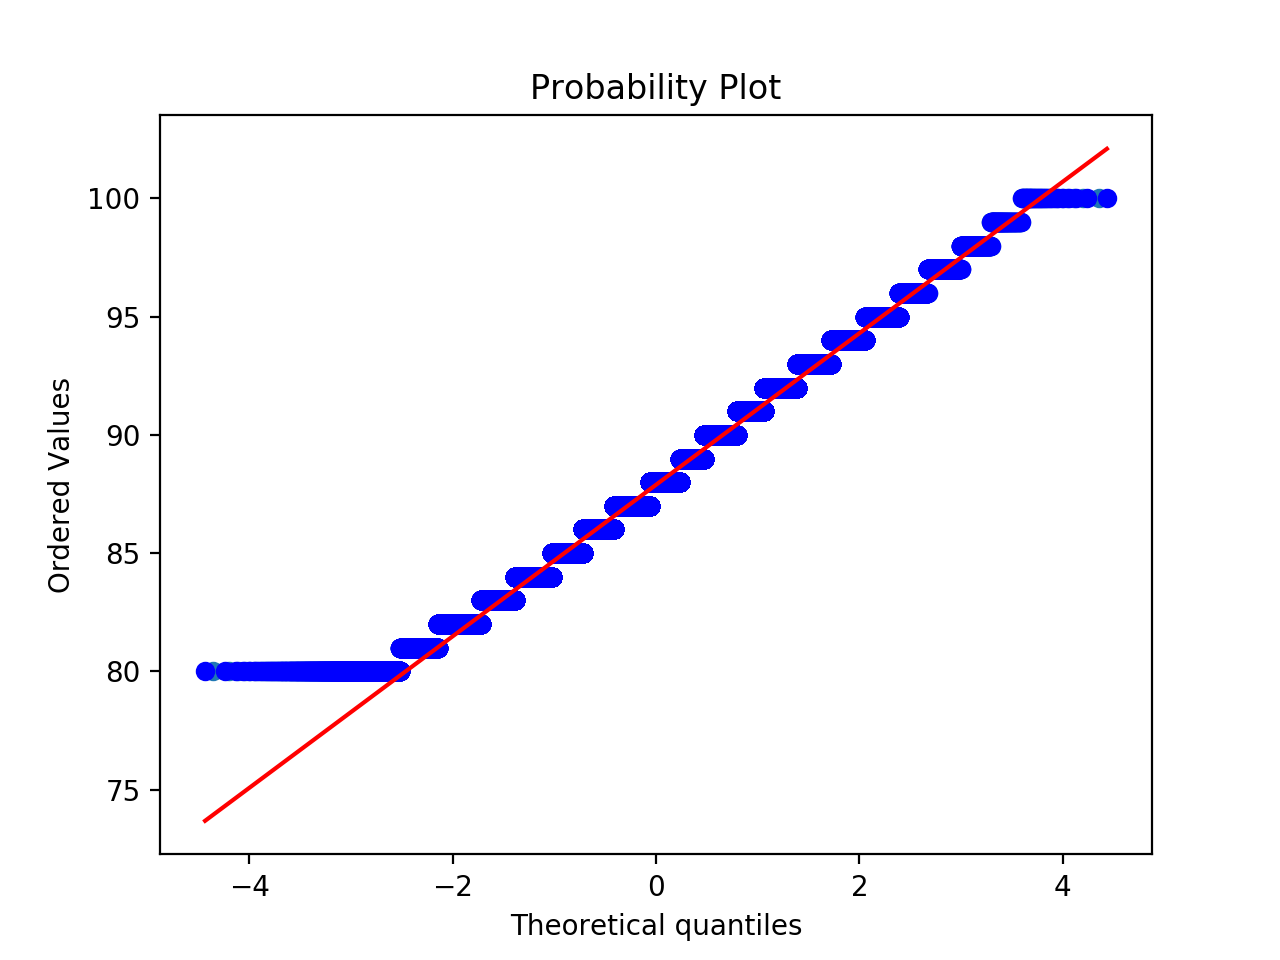

In [4]:
from IPython.display import Image
Image(filename = 'points_qq.png', width=500, height=500)

####2.2 数据缺失的处理
<p>观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:
<p>由于属性值较多，这里数值属性我们以price数值属性为例，标称属性我们以country为例；
<p>** 属性值缺失的原因可能为：红酒数据收集是数据缺失 **
<p>2.2.1 将缺失部分剔除(这里直接展示剔除缺失值之后与原数据集的对比可视化)
<p>** price直方图 **(左为丢弃数据后直方图，右为原始数据直方图)

In [ ]:
#原始数据集（去重处理后）
wineV2 = pd.DataFrame(pd.read_csv('winemag-data-130k-v2.csv'))

#删除
#直方图
plt.hist(wine['price'].dropna(), bins=100, edgecolor='black')
# 添加x轴和y轴标签
plt.xlabel('price')
plt.ylabel('frequency')
# 添加标题
plt.title('Wine-Price distribution')
plt.savefig('./wineResult/price_delete_hist.png')
plt.show()
#原始直方图
plt.hist(wineV2['price'], bins=100, edgecolor='black')
# 添加x轴和y轴标签
plt.xlabel('price')
plt.ylabel('frequency')
# 添加标题
plt.title('Wine-Price distribution')
plt.savefig('./wineResult/priceCom_hist.png')
plt.show()

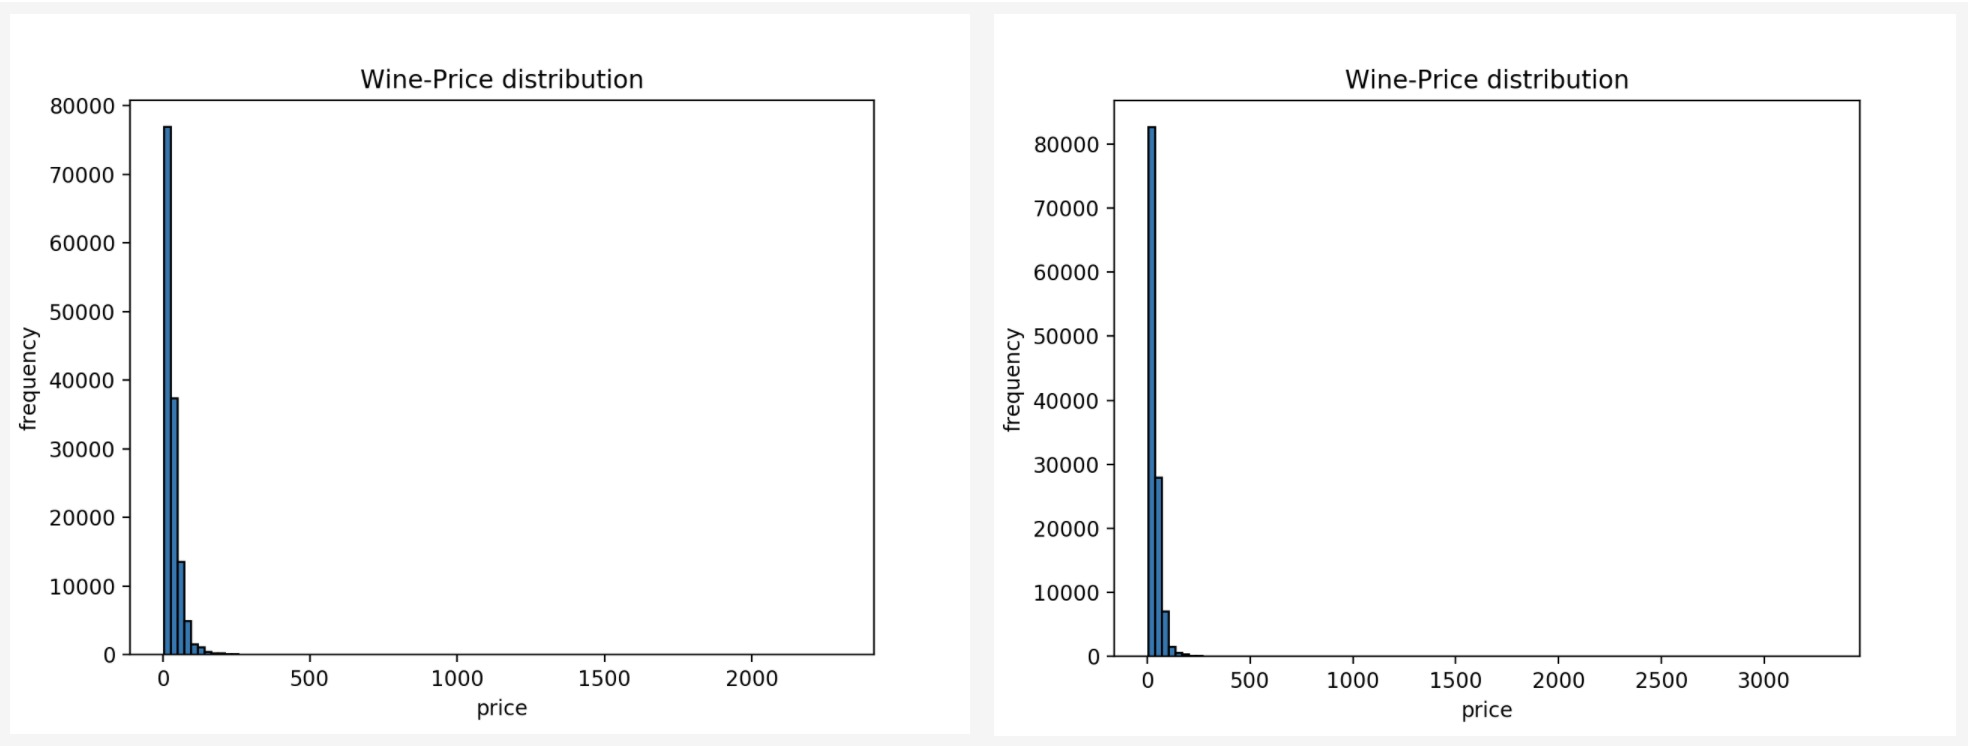

In [3]:
from IPython.display import Image
Image(filename = 'price_hist.png')

<p>** country直方图 **(左为丢弃数据后直方图，右为原始数据直方图)

In [ ]:
#country属性删除缺失值
#直方图
plt.hist(wine['country'].dropna(), bins=50, edgecolor='black')
# 添加x轴和y轴标签
plt.xlabel('country')
plt.ylabel('frequency')
# 添加标题
plt.title('Wine-Country distribution')
plt.xticks(rotation=90)
plt.tick_params(labelsize=6)
plt.savefig('./wineResult/country_delete_hist.png')
plt.show()
#原始
plt.hist(wineV2['country'].dropna(), bins=100, edgecolor='black')
# 添加x轴和y轴标签
plt.xlabel('country')
plt.ylabel('frequency')
# 添加标题
plt.title('Wine-Country distribution')
plt.xticks(rotation=90)
plt.tick_params(labelsize=6)
plt.savefig('./wineResult/countryCom_hist.png')
plt.show()

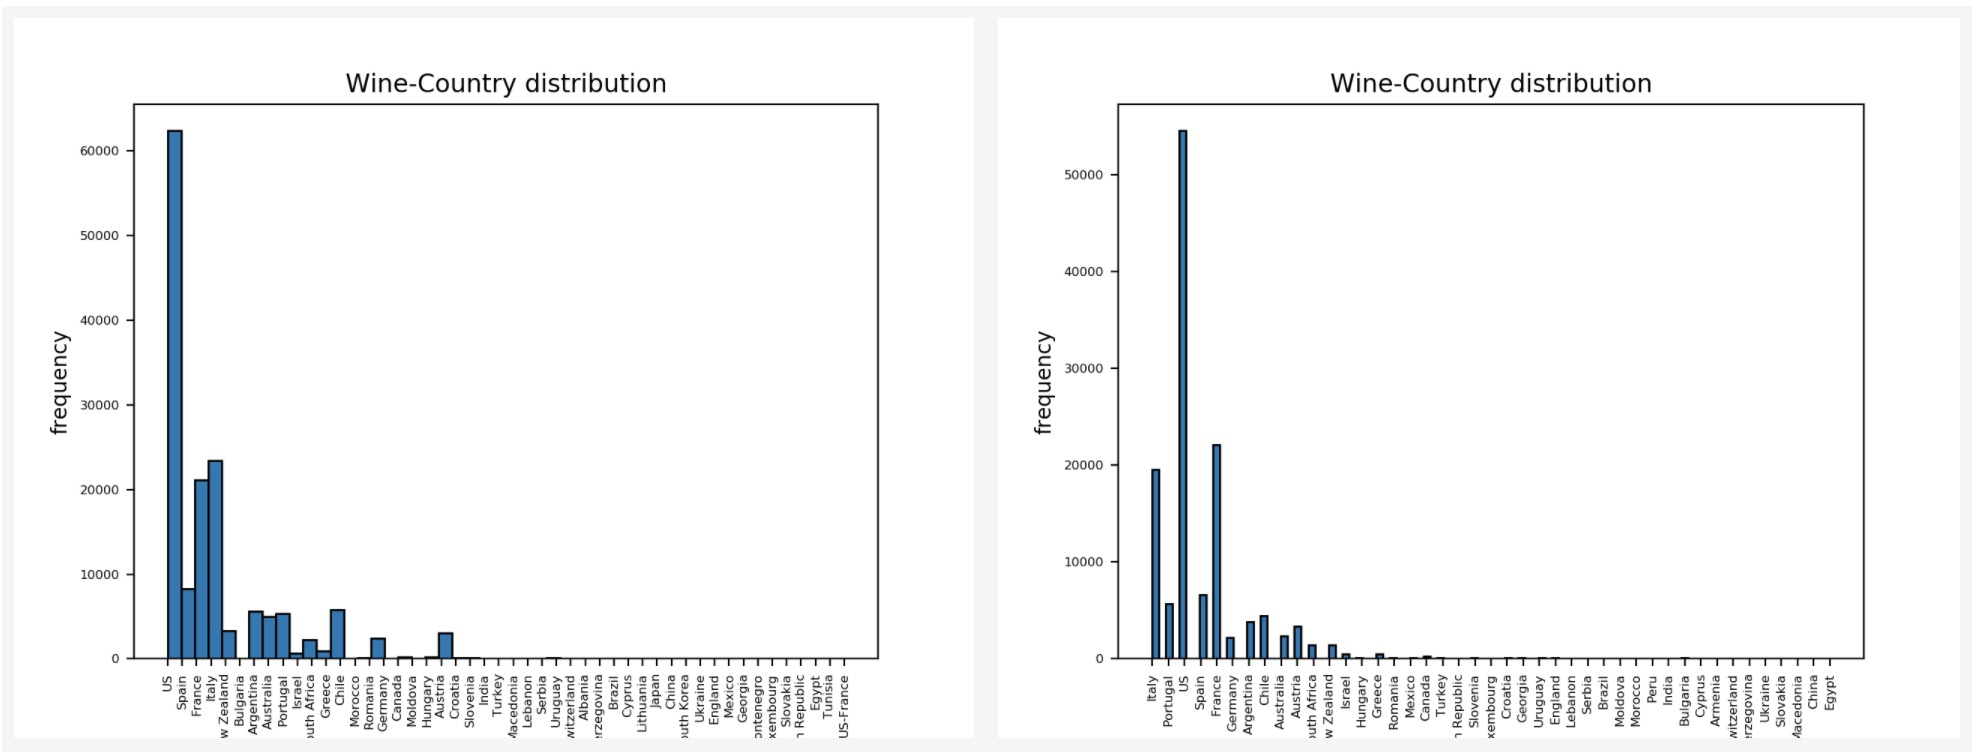

In [29]:
from IPython.display import Image
Image(filename = 'countryNew.png')

<p>** price盒图 **(左为丢弃数据后盒图，右为原始数据盒图)

In [ ]:
#盒图
priceNa = pd.DataFrame(pd.read_csv('winemag-data_first150k.csv').price).dropna()
priceNa.boxplot(sym='o')
plt.ylabel('price')
plt.title('Wine-Price Boxplot')
plt.savefig('./wineResult/price_delete_box.png')
plt.show()

#原始数据盒图
priceNa = pd.DataFrame(pd.read_csv('winemag-data-130k-v2.csv').price)
priceNa.boxplot(sym='o')
plt.ylabel('price')
plt.title('Wine-Price Boxplot')
plt.savefig('./wineResult/priceCom_box.png')
plt.show()

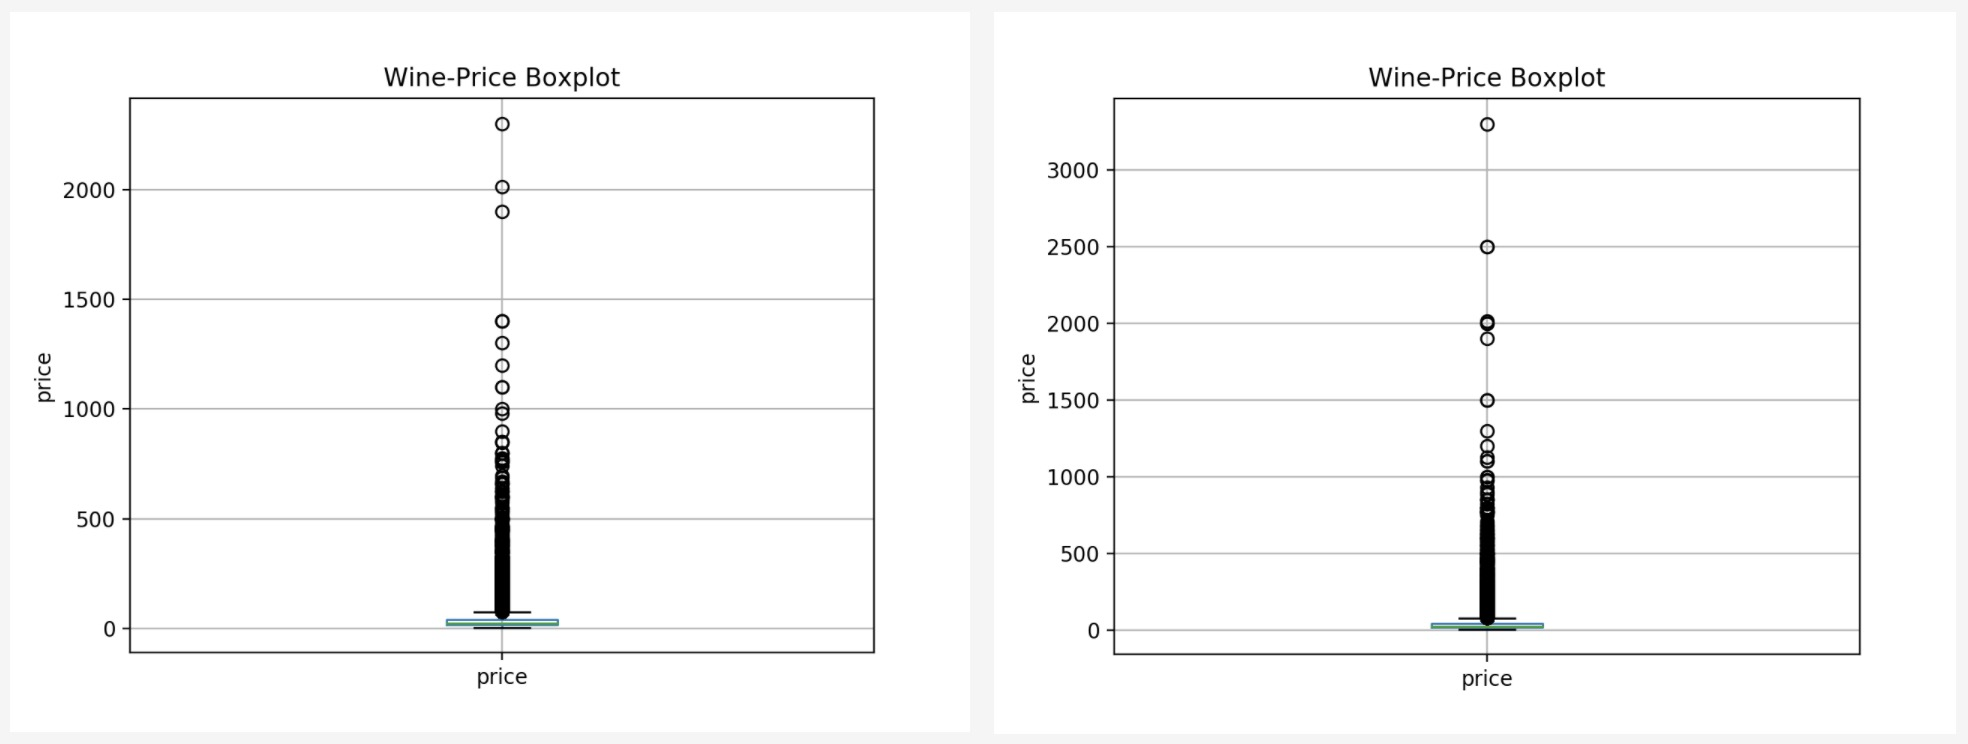

In [4]:
from IPython.display import Image
Image(filename = 'price_box2.png')

<p>** priceQ-Q图 **(左为丢弃数据后Q-Q图，右为原始数据Q-Q图)

In [ ]:
#Q-Q图
sorted_ = np.sort(wine['price'].dropna())
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(wine['price'].dropna(), dist="norm", plot=plt)
plt.savefig('./wineResult/price_delete_qq.png')
plt.show()
#原始数据Q-Q图
sorted_ = np.sort(wineV2['price'].dropna())
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(wineV2['price'].dropna(), dist="norm", plot=plt)
plt.savefig('./wineResult/priceCom_qq.png')
plt.show()

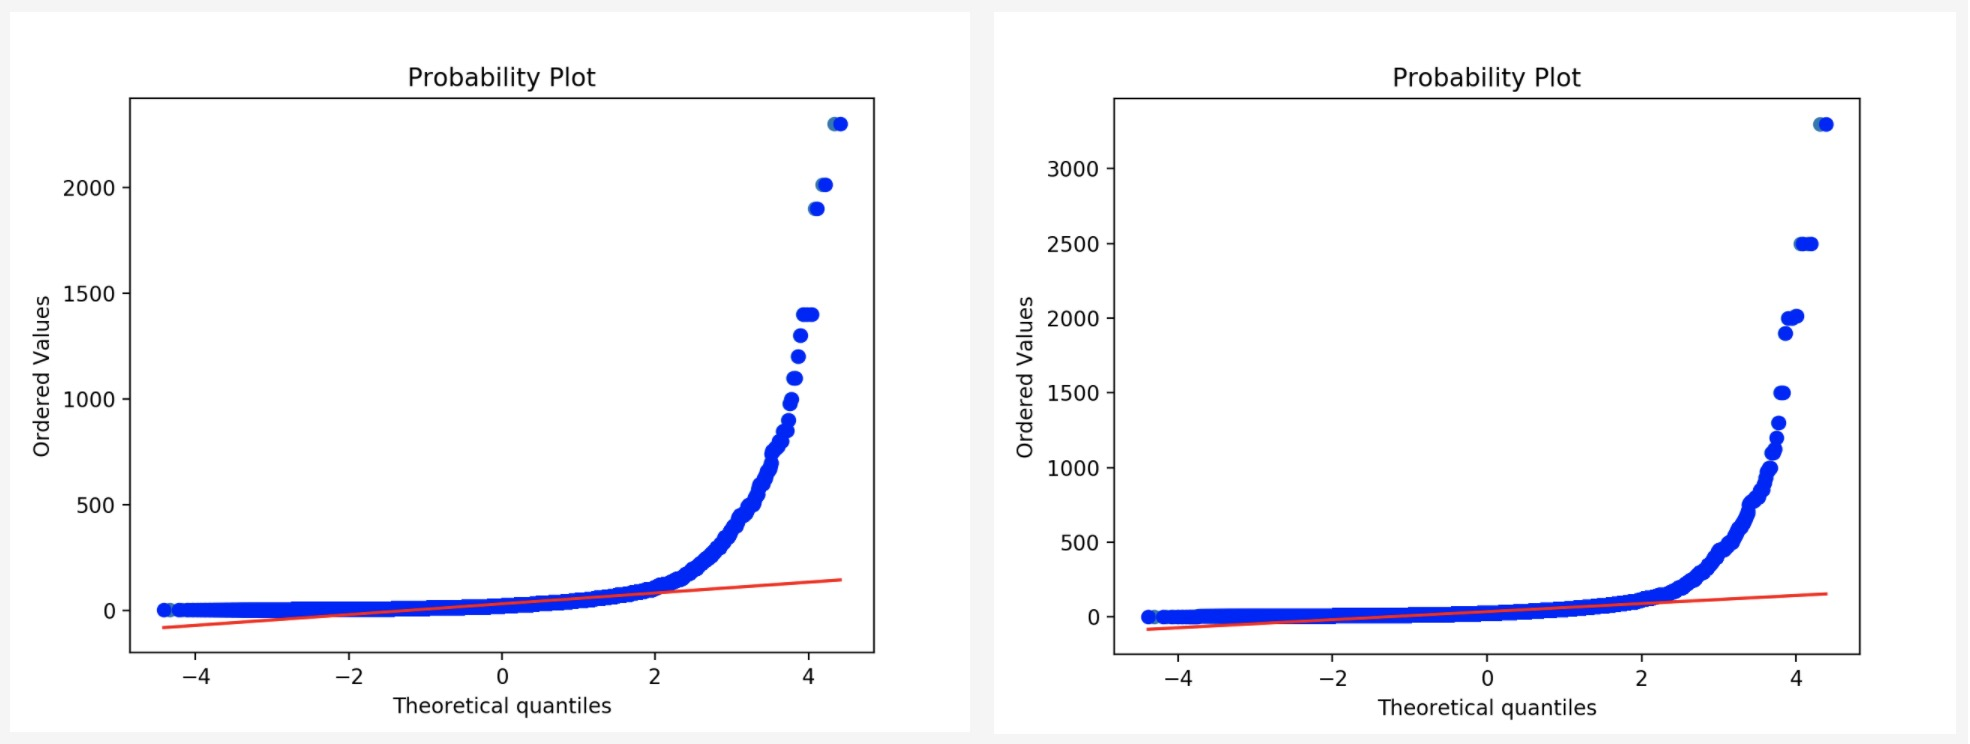

In [5]:
from IPython.display import Image
Image(filename = 'price_delete_qq.png')

<p>2.2.2 用最高频率值来填补缺失值
<p>** price直方图 **(左为利用众数填充缺失值后直方图，右为原始数据直方图)

In [ ]:
plt.hist(wine['price'].fillna(wine['price'].interpolate(missing_values='NaN', strategy='mode', axis=0, verbose=0, copy=True)),
         bins=100, edgecolor='black')
# 添加x轴和y轴标签
plt.xlabel('price')
plt.ylabel('frequency')
# 添加标题
plt.title('Wine-Price distribution')
plt.savefig('./wineResult/price_mode_hist.png')
plt.show()

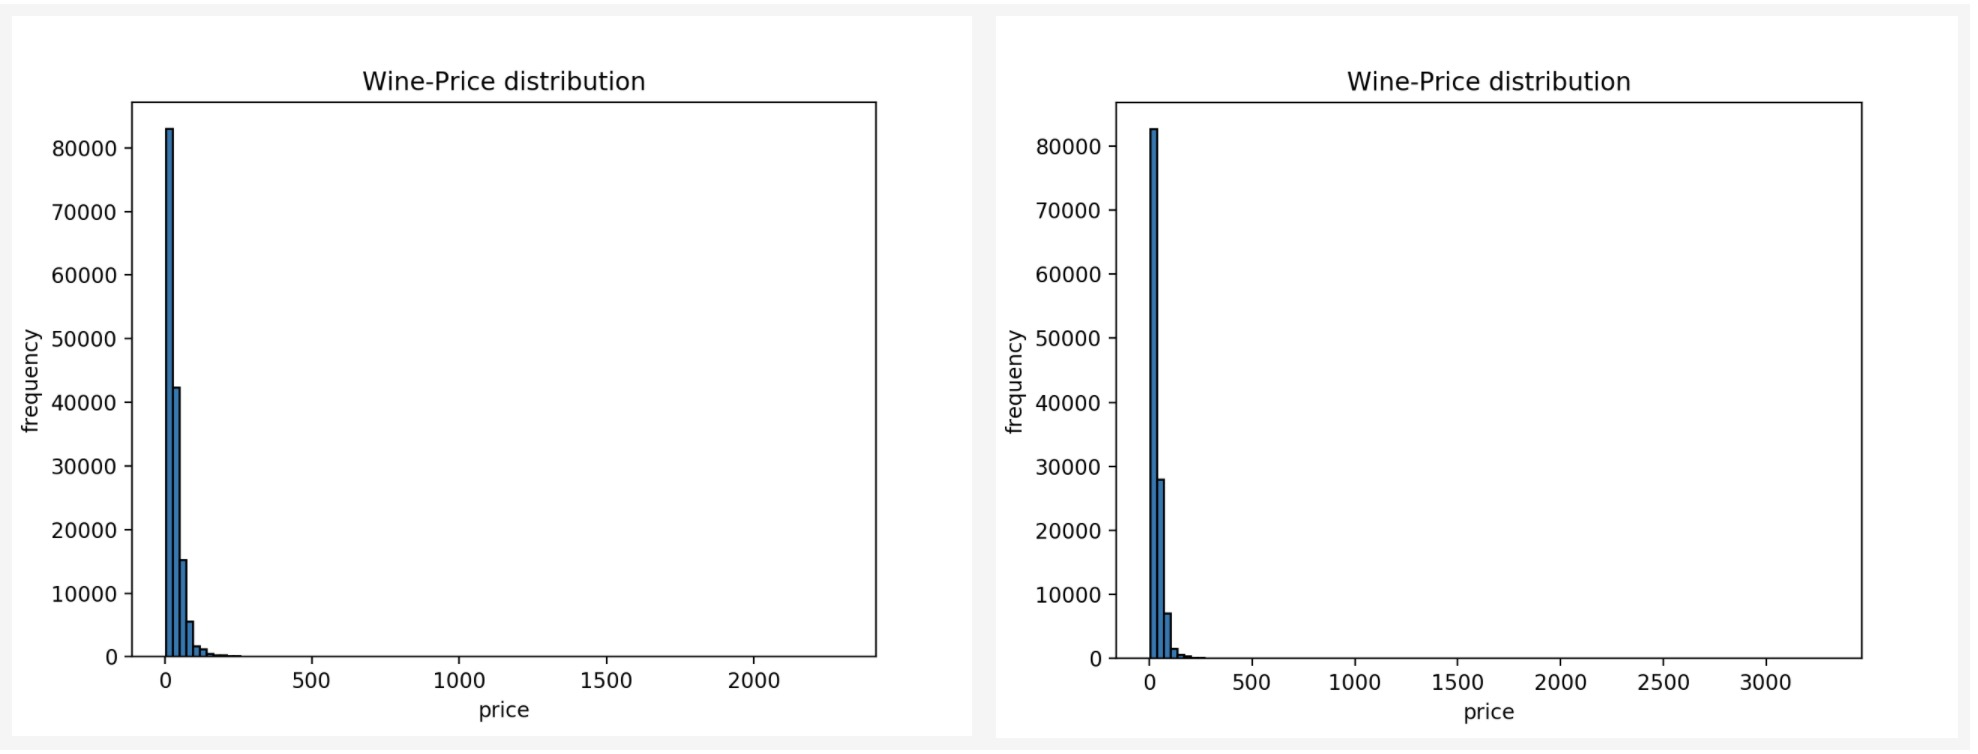

In [10]:
from IPython.display import Image
Image(filename = 'price_mode_hist.png')

<p>** country直方图 **(左为利用众数填充缺失值后直方图，右为原始数据直方图)

In [ ]:
#country属性最高频率填充缺失值
#直方图
plt.hist(wine['country'].fillna('US'), bins=50, edgecolor='black')
# 添加x轴和y轴标签
plt.xlabel('country')
plt.ylabel('frequency')
# 添加标题
plt.title('Wine-Country distribution')
plt.xticks(rotation=90)
plt.tick_params(labelsize=6)
plt.savefig('./wineResult/country_mode_hist.png')
plt.show()

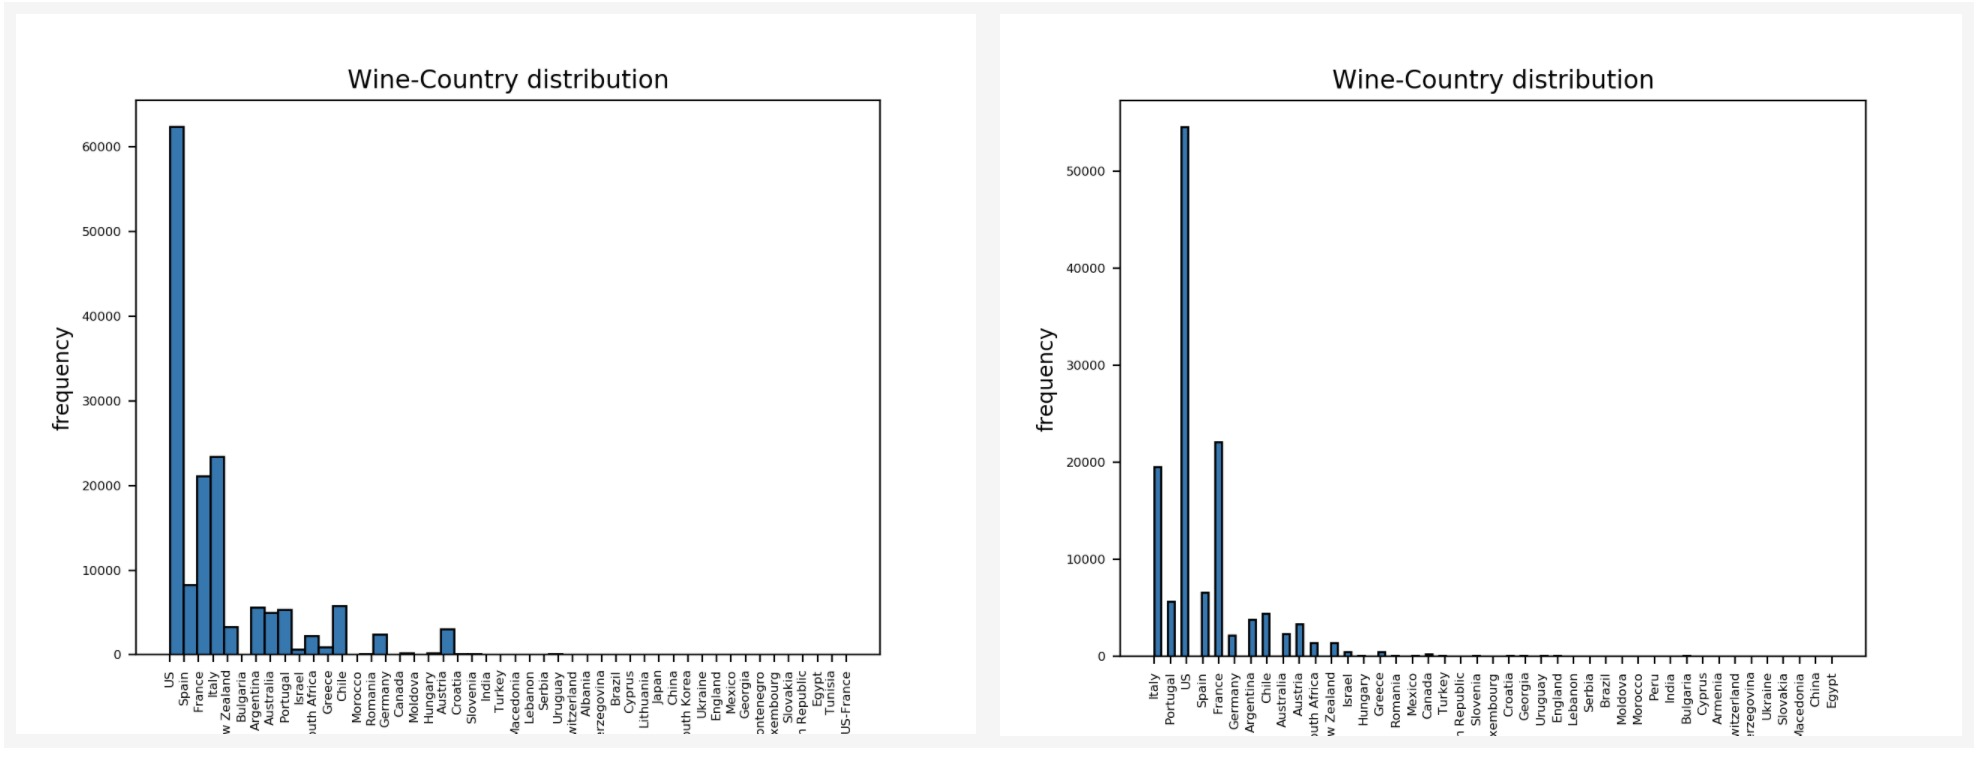

In [31]:
from IPython.display import Image
Image(filename = 'countryNew_mode.png')

<p>** price盒图 **(左为利用众数填充缺失值后盒图，右为原始数据盒图)

In [ ]:
#盒图
priceNa = pd.DataFrame(pd.read_csv('winemag-data_first150k.csv').price).fillna(wine['price'].interpolate(missing_values='NaN', strategy='mode',
                                                           axis=0, verbose=0, copy=True))
priceNa.boxplot(sym='o')
plt.ylabel('price')
plt.savefig('./wineResult/price_mode_box.png')
plt.show()

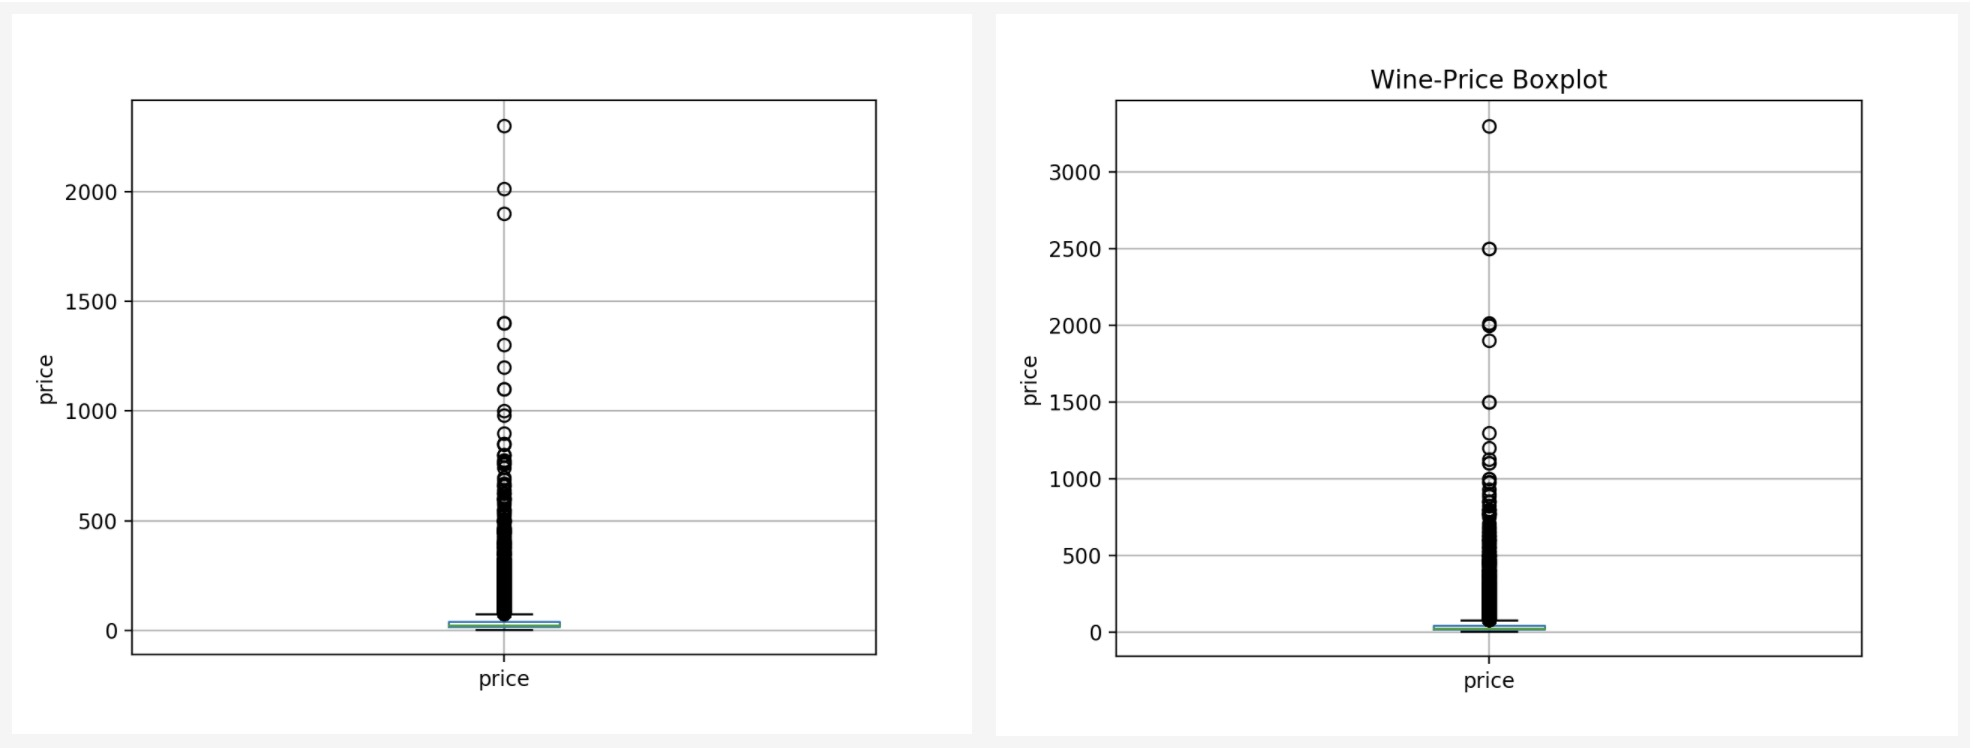

In [11]:
from IPython.display import Image, display, HTML
Image(filename = 'price_mode_box.png')

<p>** priceQ-Q图 **(左为利用众数填充缺失值后Q-Q图，右为原始数据Q-Q图)

In [ ]:
#Q-Q图
sorted_ = np.sort(wine['price'].fillna(wine['price'].interpolate(missing_values='NaN', strategy='mode', axis=0, verbose=0, copy=True)))
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(wine['price'], dist="norm", plot=plt)
plt.savefig('./wineResult/price_mode_qq.png')
plt.show()

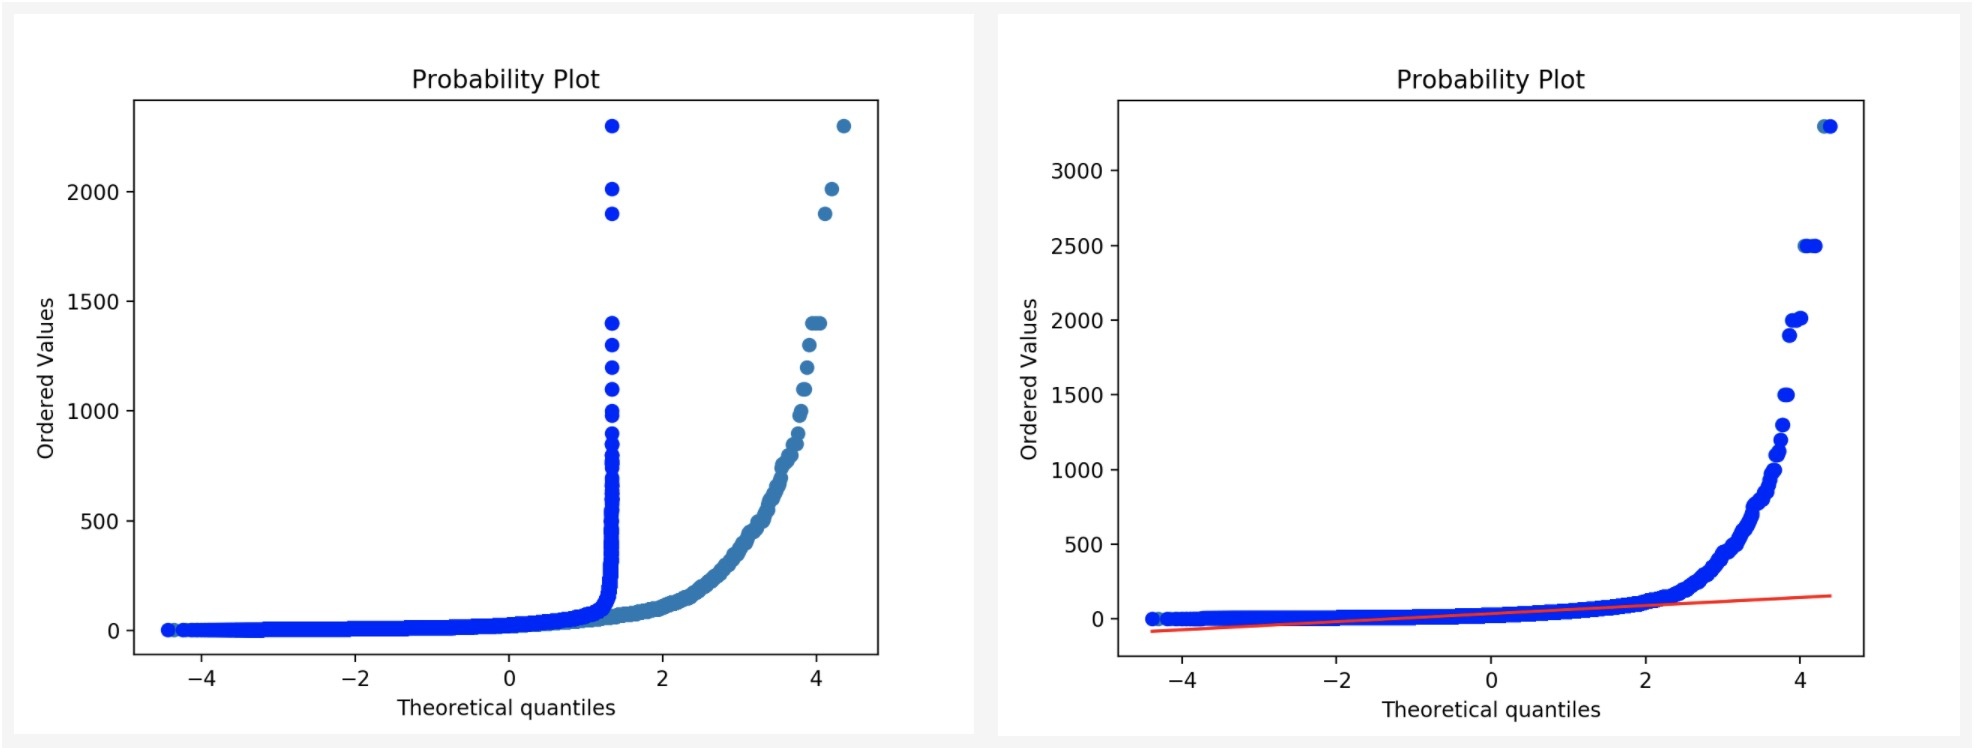

In [13]:
from IPython.display import Image
Image(filename = 'price_mode_qq.png')

<p>2.2.3 通过属性的相关关系来填补缺失值
<p>这部分缺失值本来打算用KNN（K近邻算法）来实现，即距离越近关系越好，但是代码实现有点问题就暂时用了中位数插值
<p>** price直方图 **(左为利用中位数填充缺失值后直方图，右为原始数据直方图)    

In [ ]:
#通过属性的相关关系来填补缺失值
wine = pd.DataFrame(pd.read_csv('winemag-data_first150k.csv'))
#直方图
plt.hist(wine['price'].interpolate(missing_values='NaN', strategy='median', axis=0, verbose=0, copy=True),
         bins=100, edgecolor='black')
# 添加x轴和y轴标签
plt.xlabel('price')
plt.ylabel('frequency')
# 添加标题
plt.title('Wine-Price distribution')
plt.savefig('./wineResult/price_means_hist.png')
plt.show()

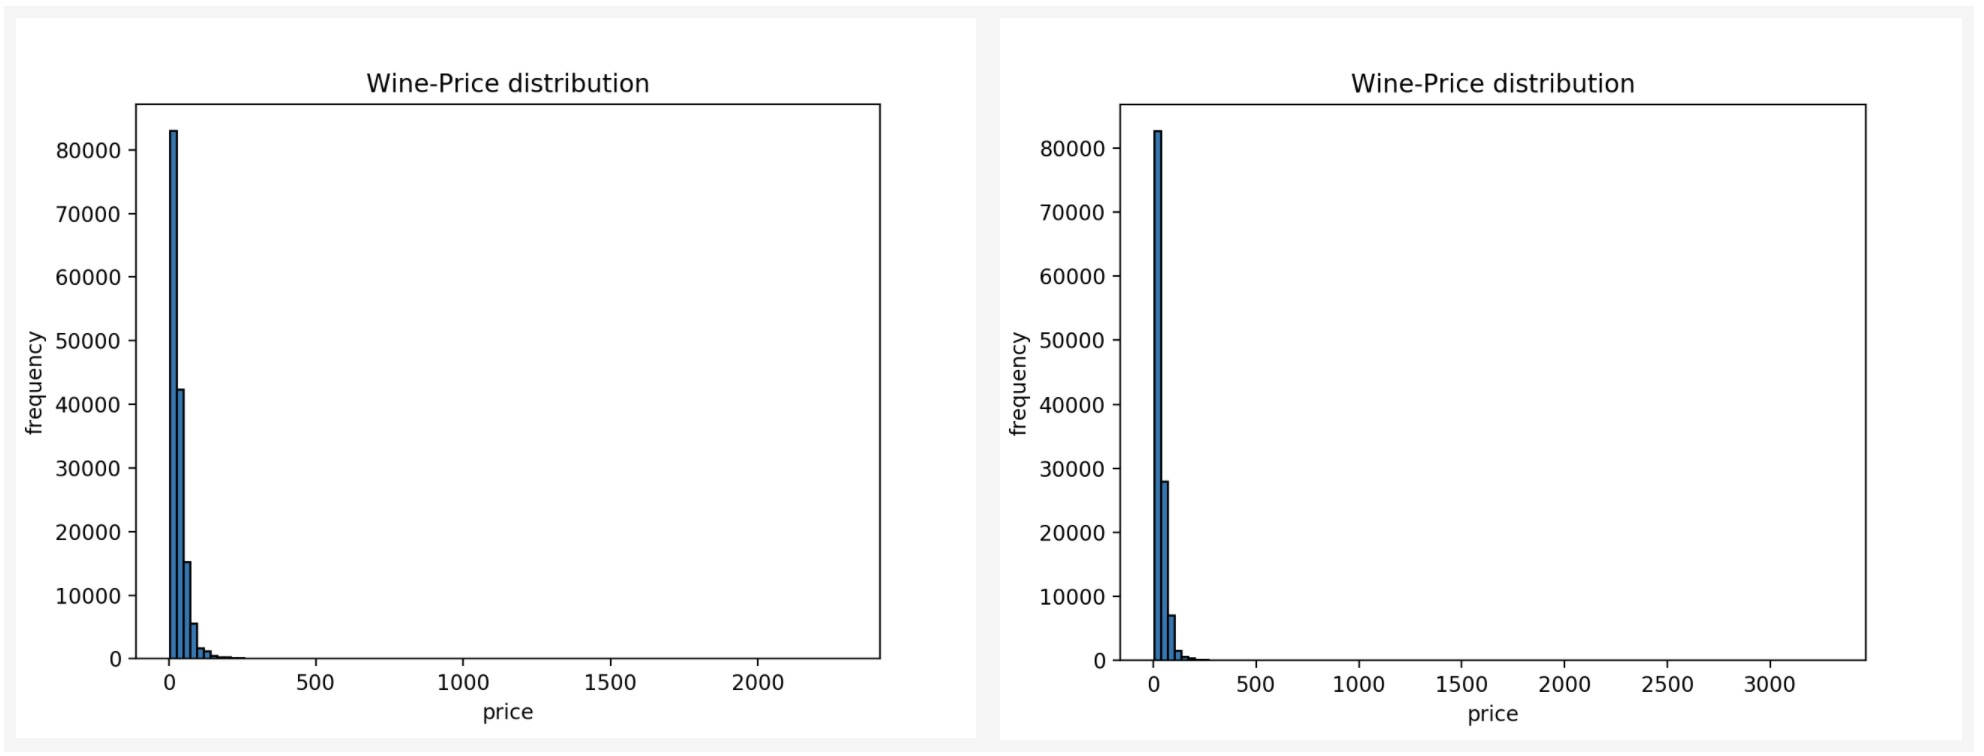

In [15]:
from IPython.display import Image
Image(filename = 'price_median_hist.png')

<p>** country直方图 ** (左为利用随机森林算法填充缺失值后直方图，右为原始数据直方图)  

In [ ]:
#随进森林实现填充country属性缺失值
wine = pd.DataFrame(pd.read_csv('winemag-data_first150k.csv'))
known_price = wine[wine['country'].notnull()]
unknown_price = wine[wine['country'].isnull()]
x = known_price[['points']]
y = known_price[['country']]
t_x = unknown_price[['points']]
fc = RandomForestClassifier()
fc.fit(x, y.values.ravel())
pr = fc.predict(t_x)
wine.loc[wine.country.isnull(), 'country'] = pr

plt.hist(wine['country'], bins=50, edgecolor='black')
# 添加x轴和y轴标签
plt.xlabel('country')
plt.ylabel('frequency')
# 添加标题
plt.title('Wine-Country distribution')
plt.xticks(rotation=90)
plt.tick_params(labelsize=6)
plt.savefig('./wineResult/country_relative_hist.png')
plt.show()

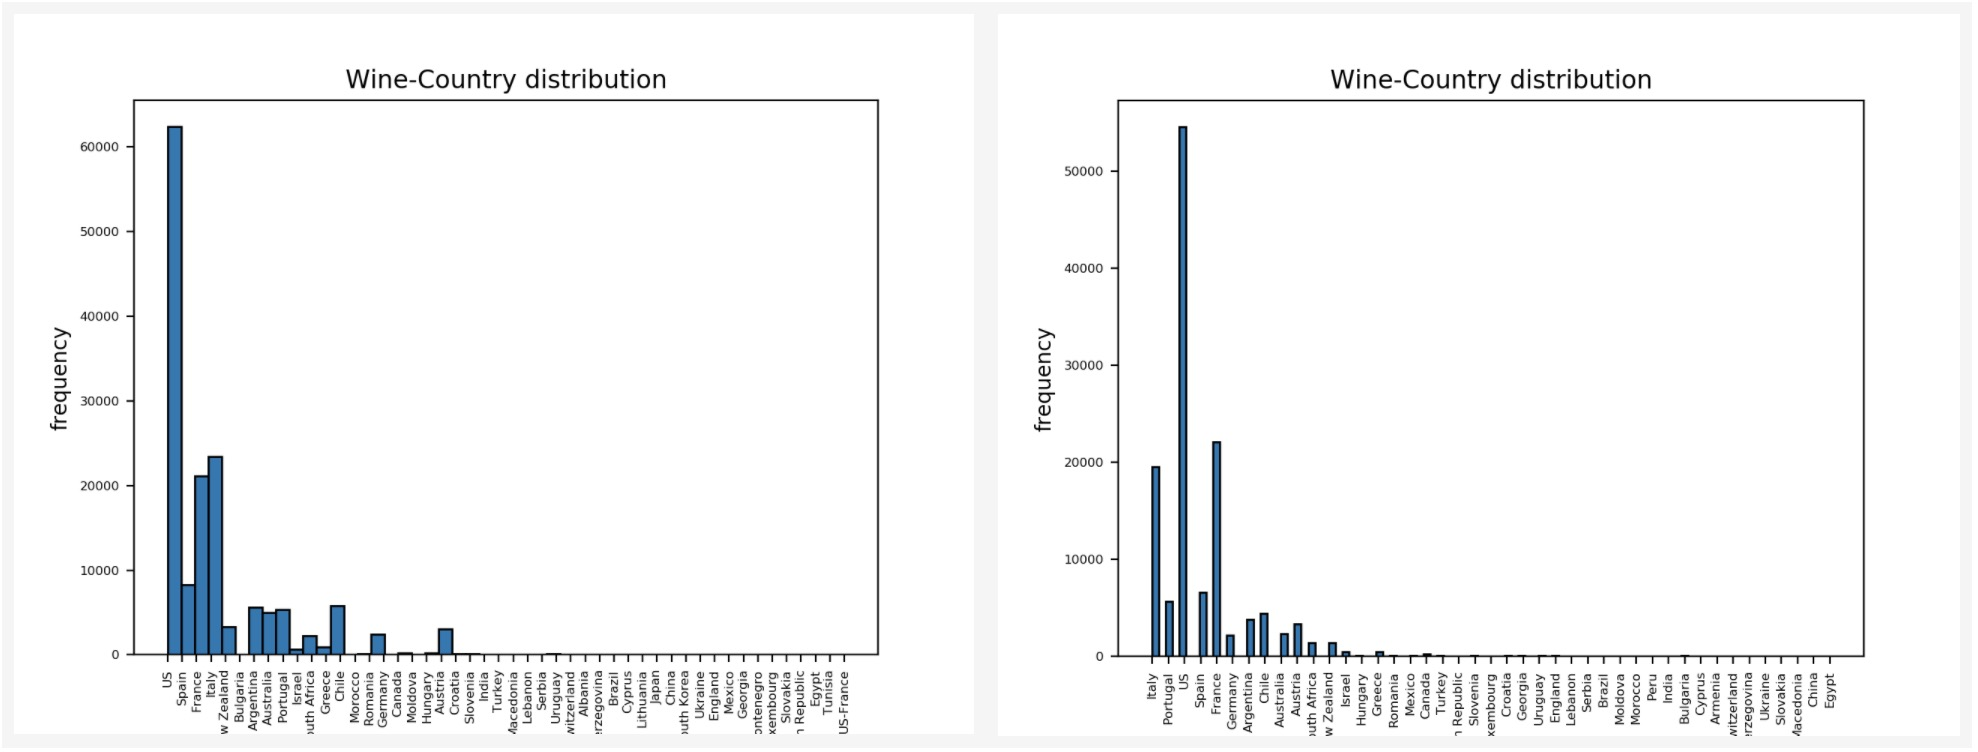

In [33]:
from IPython.display import Image
Image(filename = 'countryNew_relative.png')

<p>** price盒图 **(左为利用中位数填充缺失值后盒图，右为原始数据盒图)

In [ ]:
#盒图
priceNa = pd.DataFrame(pd.read_csv('winemag-data_first150k.csv').price).fillna(wine['price'].interpolate(missing_values='NaN', strategy='median',
                                                                                                         axis=0, verbose=0, copy=True))
priceNa.boxplot(sym='o')
plt.ylabel('price')
plt.savefig('./wineResult/price_median_box.png')
plt.show()

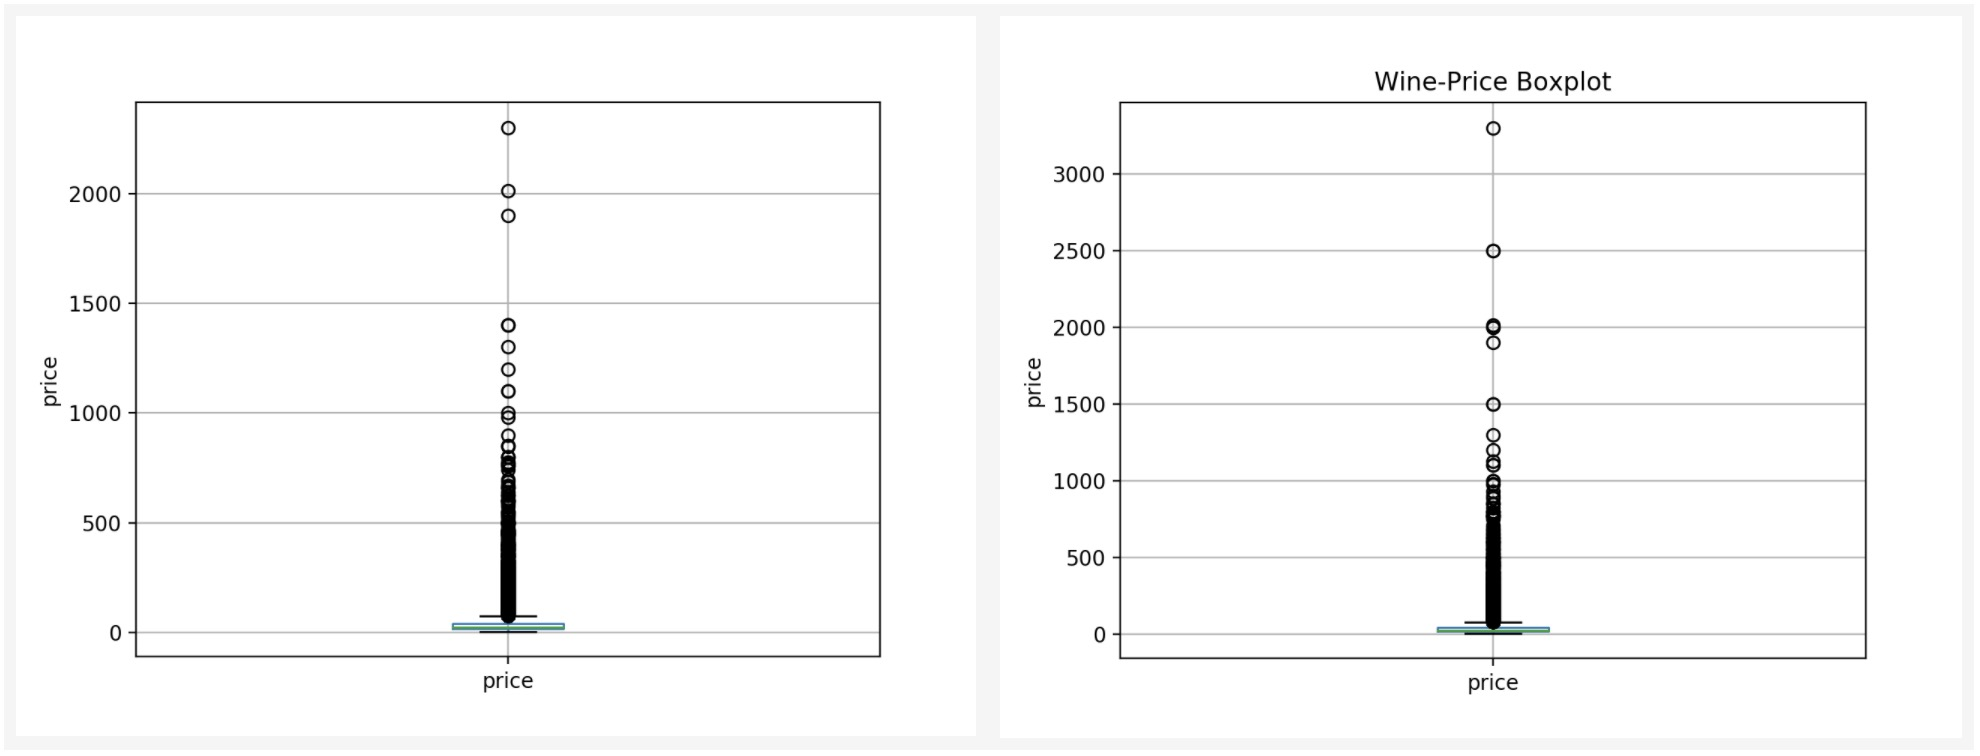

In [17]:
from IPython.display import Image
Image(filename = 'price_median_box.png')

<p>** priceQ-Q图 **(左为利用中位数填充缺失值后Q-Q图，右为原始数据Q-Q图)

In [ ]:
#Q-Q图
sorted_ = np.sort(wine['price'].interpolate(missing_values='NaN', strategy='median', axis=0, verbose=0, copy=True))
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(wine['price'].interpolate(missing_values = 'NaN', strategy='median', axis=0, verbose=0, copy=True), dist="norm", plot=plt)
plt.savefig('./wineResult/price_median_qq.png')
plt.show()

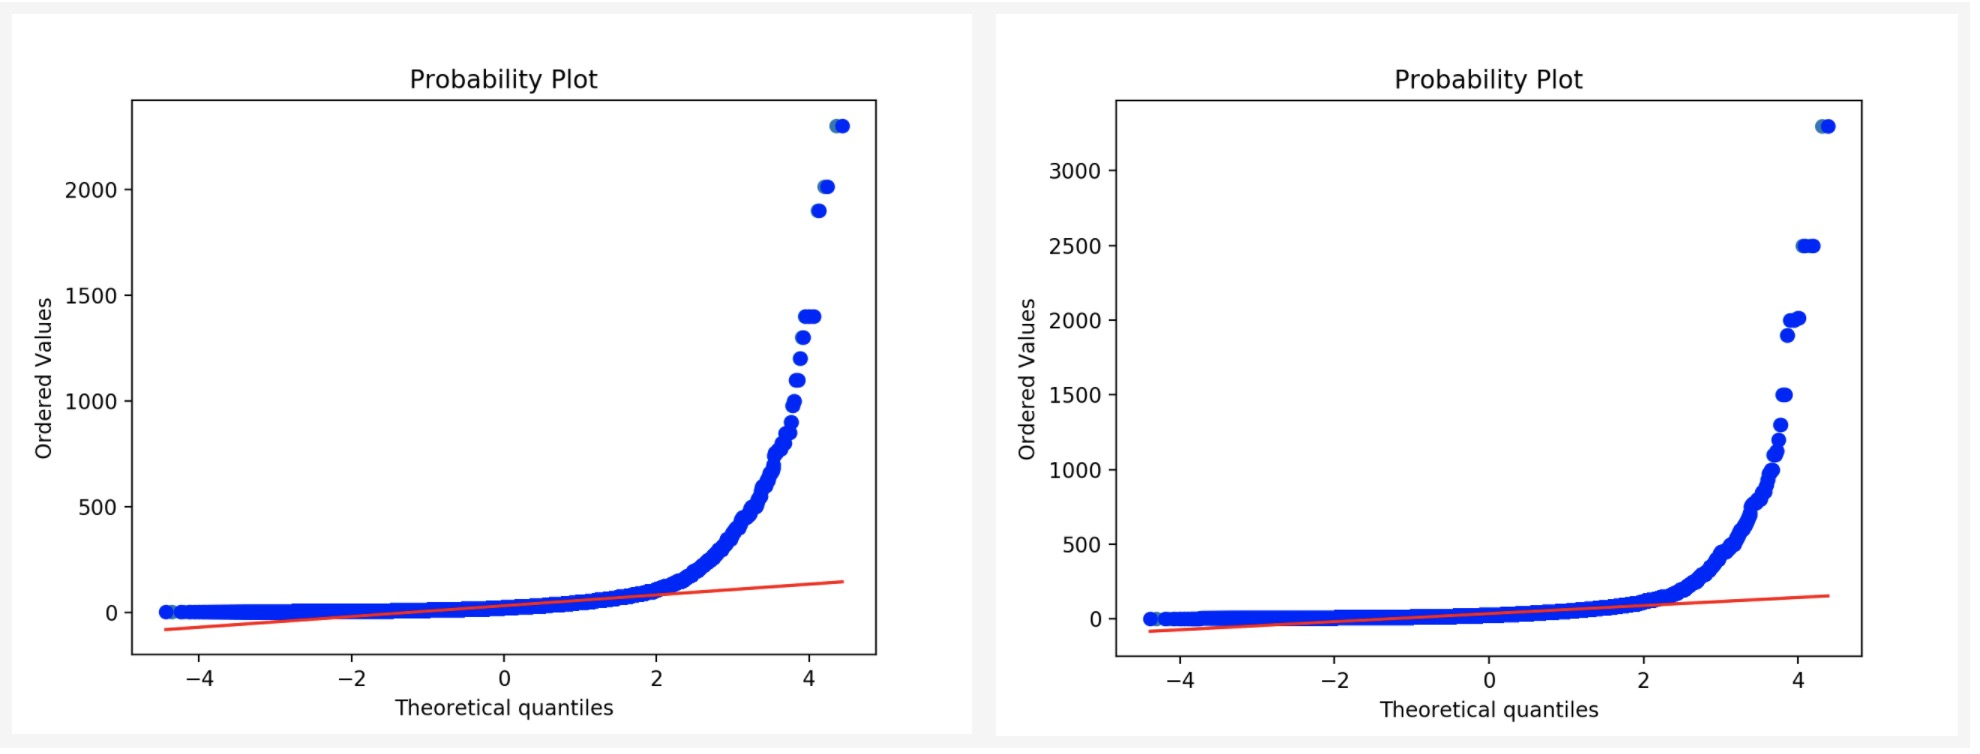

In [20]:
from IPython.display import Image
Image(filename = 'price_median_qq.png')

<p>2.2.4 通过数据对象之间的相似性来填补缺失值
<p>利用随机森林预测值来填充缺失值
<p>** price直方图 **(左为利用随机森林预测值填充缺失值后直方图，右为原始数据直方图)   

In [ ]:
#通过数据对象之间的相似性来填补缺失值
wine = pd.DataFrame(pd.read_csv('winemag-data_first150k.csv'))
known_price = wine[wine['price'].notnull()]
unknown_price = wine[wine['price'].isnull()]
x = known_price[['points']]
y = known_price[['price']]
t_x = unknown_price[['points']]
fc = RandomForestClassifier()
fc.fit(x, y.values.ravel())
pr = fc.predict(t_x)
wine.loc[wine.price.isnull(), 'price'] = pr

#直方图
plt.hist(wine['price'], bins=100, edgecolor='black')
# 添加x轴和y轴标签
plt.xlabel('price')
plt.ylabel('frequency')
# 添加标题
plt.title('Wine-Price distribution')
plt.savefig('./wineResult/price_relative_hist.png')
plt.show()

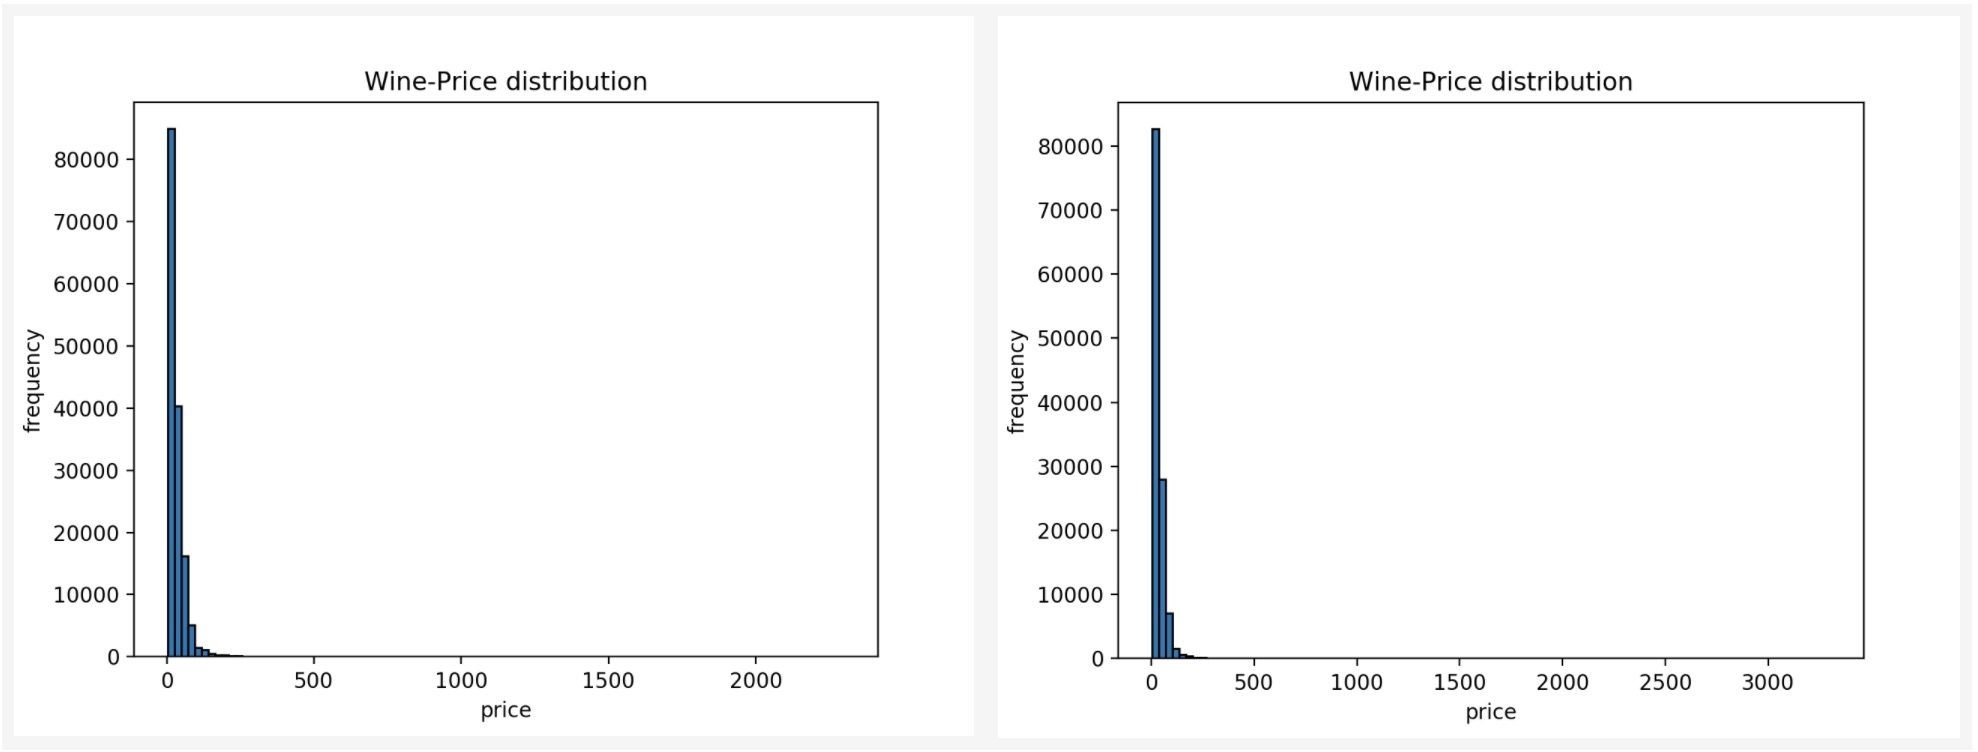

In [22]:
from IPython.display import Image
Image(filename = 'price_relative_hist.png')

<p>** price盒图 **(左为利用随机森林预测值填充缺失值后盒图，右为原始数据盒图)   

In [ ]:
#盒图
priceNa = pd.DataFrame(pd.read_csv('winemag-data_first150k.csv').price)
priceNa.boxplot(sym='o')
plt.ylabel('price')
plt.savefig('./wineResult/price_relative_box.png')
plt.show()

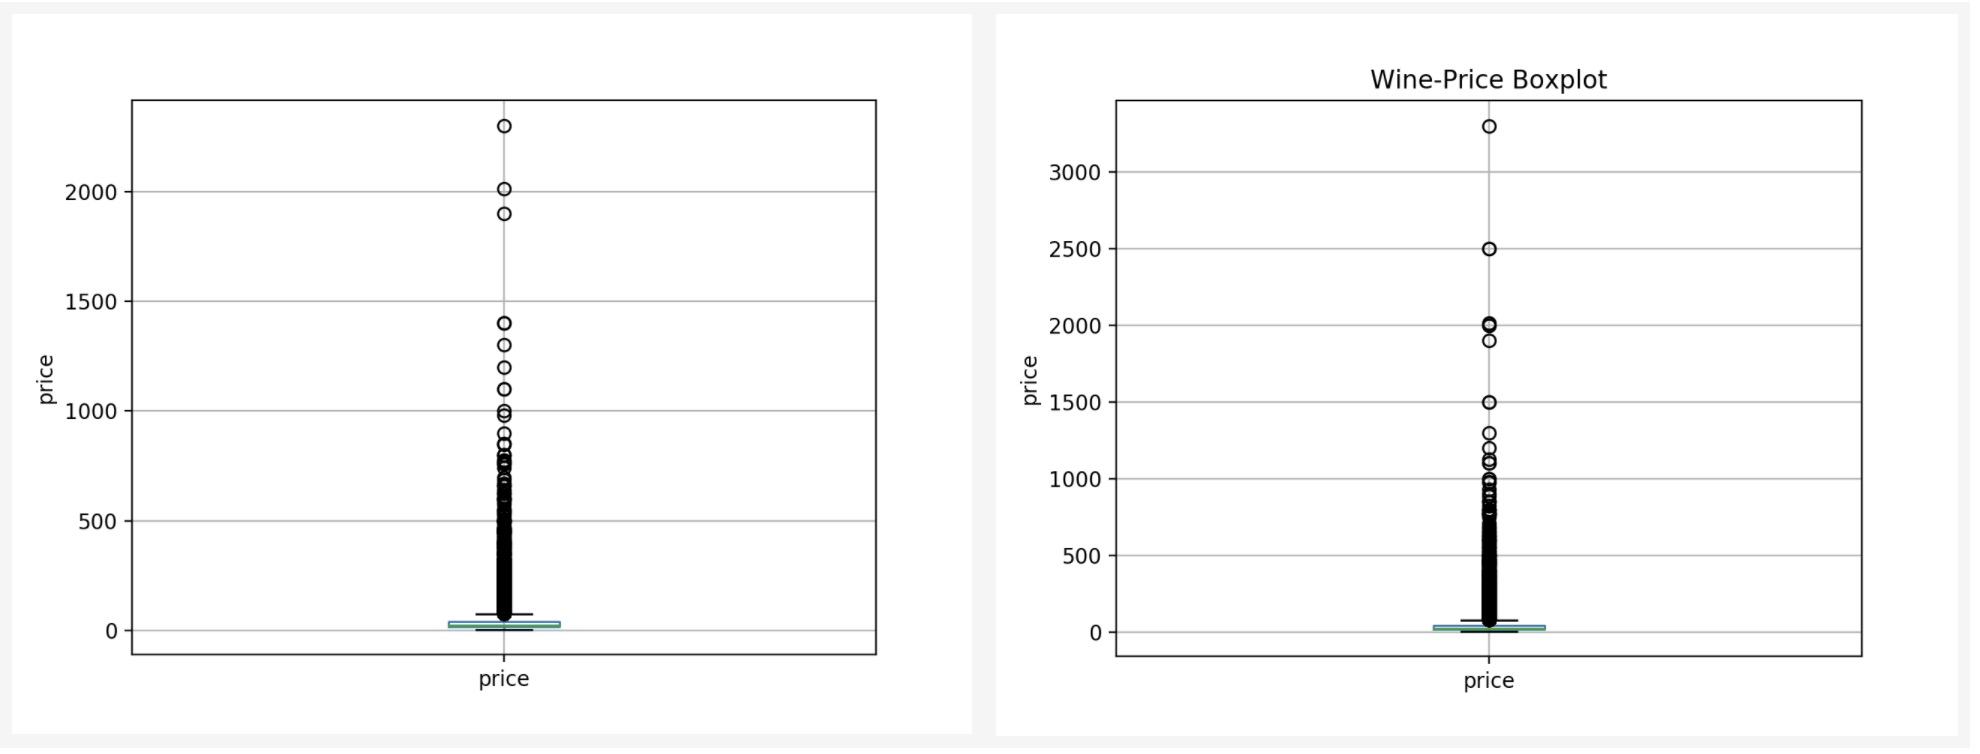

In [24]:
from IPython.display import Image
Image(filename = 'price_relative_box.png')

<p>** priceQ-Q图 **(左为利用随机森林预测值填充缺失值后Q-Q图，右为原始数据Q-Q图)

In [ ]:
#Q-Q图
sorted_ = np.sort(wine['price'])
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(wine['price'])
plt.savefig('./wineResult/price_relative_qq.png')
plt.show()

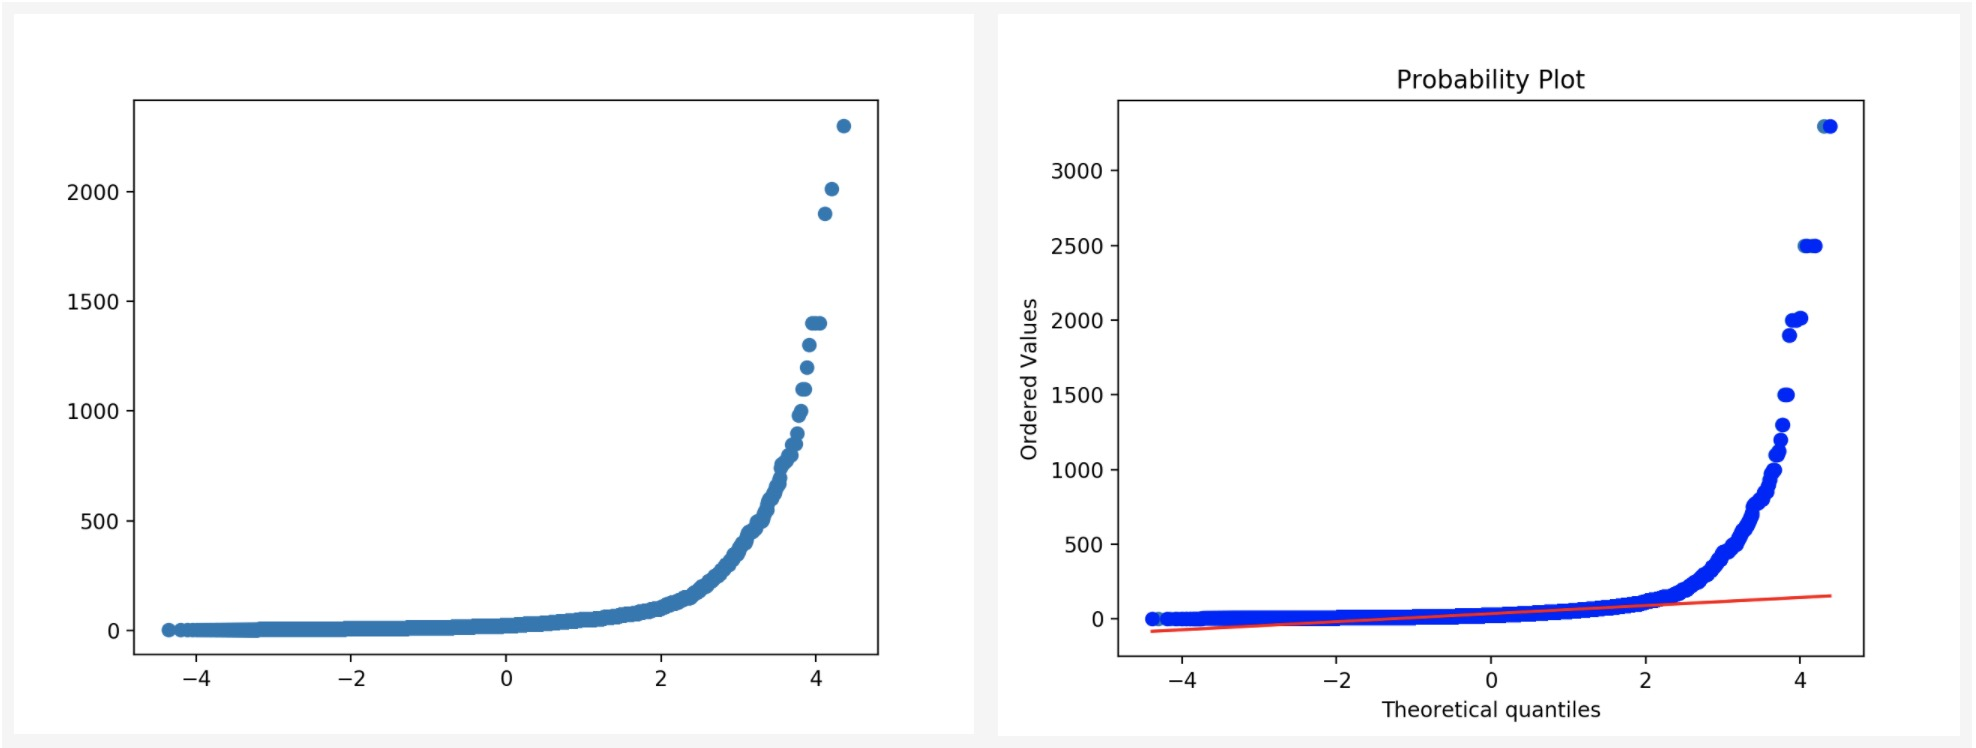

In [26]:
from IPython.display import Image
Image(filename = 'price_relative_qq.png')

#自行选择两个数据集进行探索性分析
##分析报告二
###一、数据
####1.1 数据集选择
    该数据集中csv个数较多，这里选择四个做分析
    Trending YouTube Video Statistics：USvideos.csv CAvideos.csv INvideos.csv MXvideos.csv
####1.2 编程语言：python

####1.3 导入所需各类依赖包

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

USvideo = pd.DataFrame(pd.read_csv('USvideos.csv', encoding='ANSI', low_memory=False))
CAvideo = pd.DataFrame(pd.read_csv('CAvideos.csv', encoding='ANSI', low_memory=False))
INvideo = pd.DataFrame(pd.read_csv('INvideos.csv', encoding='ANSI', low_memory=False))
DEvideo = pd.DataFrame(pd.read_csv('DEvideos.csv', low_memory=False))

###二、数据分析要求
####2.1 数据可视化及摘要
\* 数据摘要
<p>2.1.1 标称属性，给出每个可能取值的频数
    <p>该数据集中标称属性有：category_id、title、channel_title
    <p>由于属性值较多，这里我们以category_id为例作展示，其余标称属性可能取值的频数运行代码后可查看
    <p>** Name: category_id, dtype: int64 **

In [ ]:
#category_id标称属性，每个可能取值的频数
print(USvideo['category_id'].value_counts())
print(CAvideo['category_id'].value_counts())
print(INvideo['category_id'].value_counts())
print(DEvideo['category_id'].value_counts())

| USvideo-category_id | 频数 |           | CAvideo-category_id | 频数 |
| :-----: | :-----: |                   | :-----: | :-----: |
| 24 | 9964 |                           | 24 | 13451 |
| 10 | 6472 |                           | 25 |  4159 |
| 26 | 4146 |                           | 22 |  4105 |
| 23 | 3457 |                           | 23 |  3773 |
| 22 | 3210 |                           | 10 |  3731 |
| 25 | 2487 |                           | 17 |  2787 |
| 28 | 2401 |                           |  1 |  2060 |
| 1  | 2345 |                           | 26 |  2007 |
| 17 | 2174 |                           | 20 |  1344 |
| 27 | 1656 |                           | 28 |  1155 |
| 15 |  920 |                           | 27 |   991 |
| 20 |  817 |                           | 19 |   392 |
| 19 |  402 |                           | 15 |   369 |
| 2  |  384 |                           |  2 |   353 | 
| 29 |   57 |                           | 43 |   124 |
| 43 |   57 |                           | 29 |    74 | 
                                        | 30 |     6 |
                                        
| INvideo-category_id | 频数 |           | DEvideo-category_id | 频数 |
| :-----: | :-----: |                   | :-----: | :-----: |
| 24 | 16712 |                          | 24 | 15292 |
| 25 | 5241 |                           | 22 |  5988 |
| 10 | 3858 |                           | 25 |  2935 |
| 23 | 3429 |                           | 17 |  2752 |
| 22 | 2624 |                           | 23 |  2534 |
|  1 | 1658 |                           |  1 |  2376 |
| 27 | 1227 |                           | 10 |  2372 |
| 26 |  845 |                           | 26 |  1745 |
| 17 |  731 |                           | 20 |  1565 |
| 28 |  552 |                           |  2 |   873 |
| 43 |  205 |                           | 27 |   844 |
| 29 |  105 |                           | 28 |   806 |
|  2 |   72 |                           | 29 |   256 |
| 20 |   66 |                           | 15 |   251 | 
| 30 |   16 |                           | 19 |   141 |
| 19 |    8 |                           | 43 |   107 | 
| 15 |    3 |                           | 30 |     2 |
                                        | 44 |     1 |

<p>** category_id属性直方图 **
<p>从左至右依次是

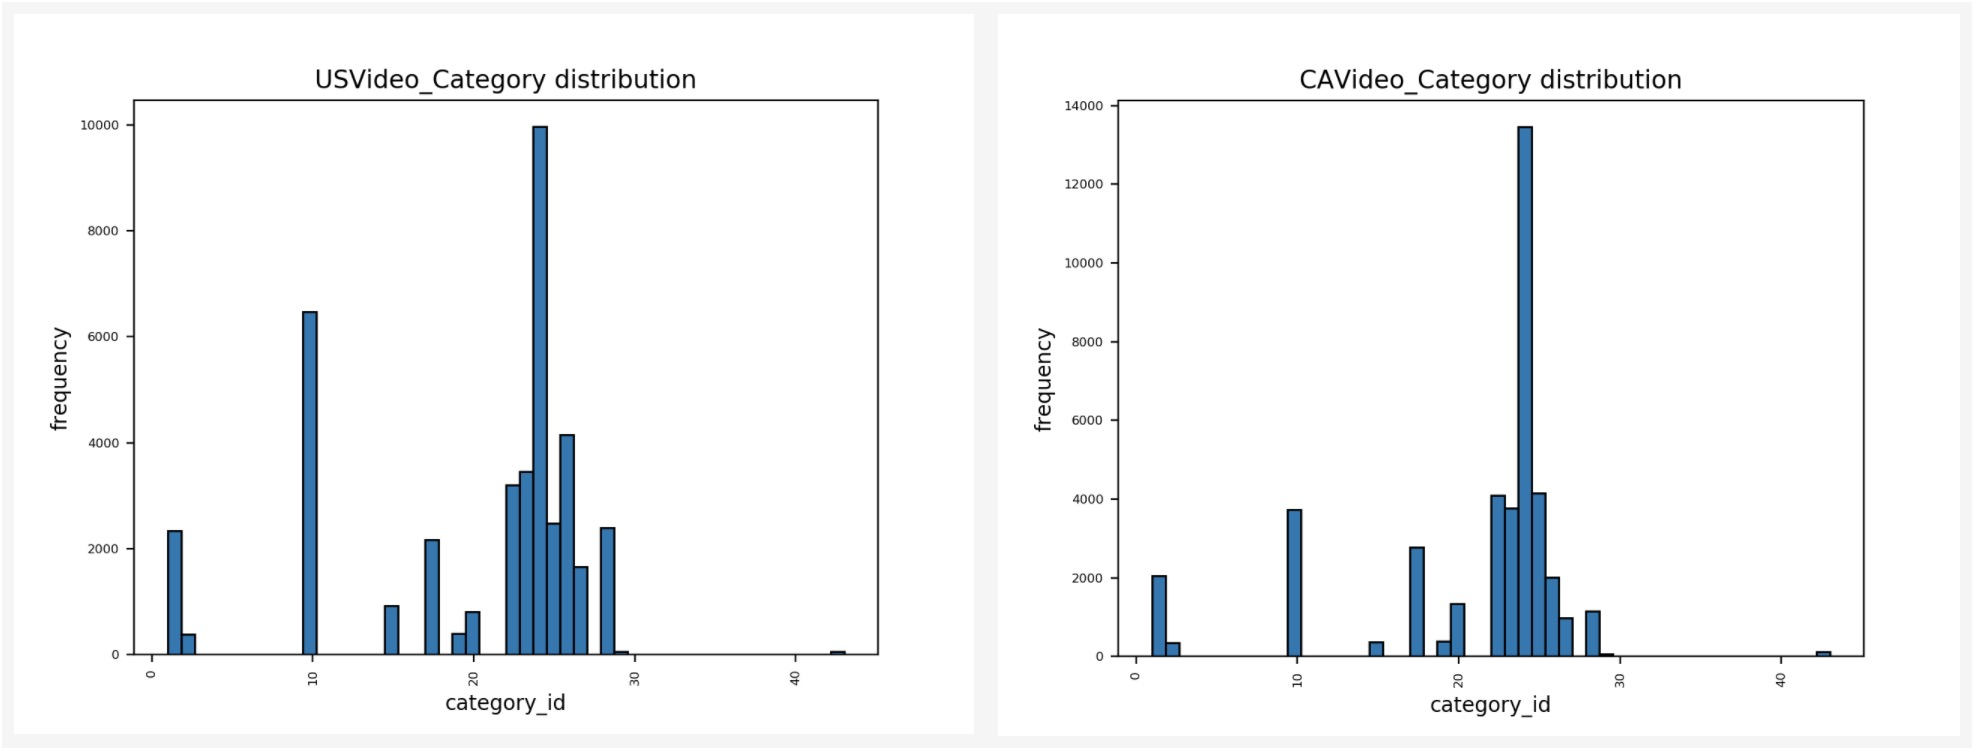

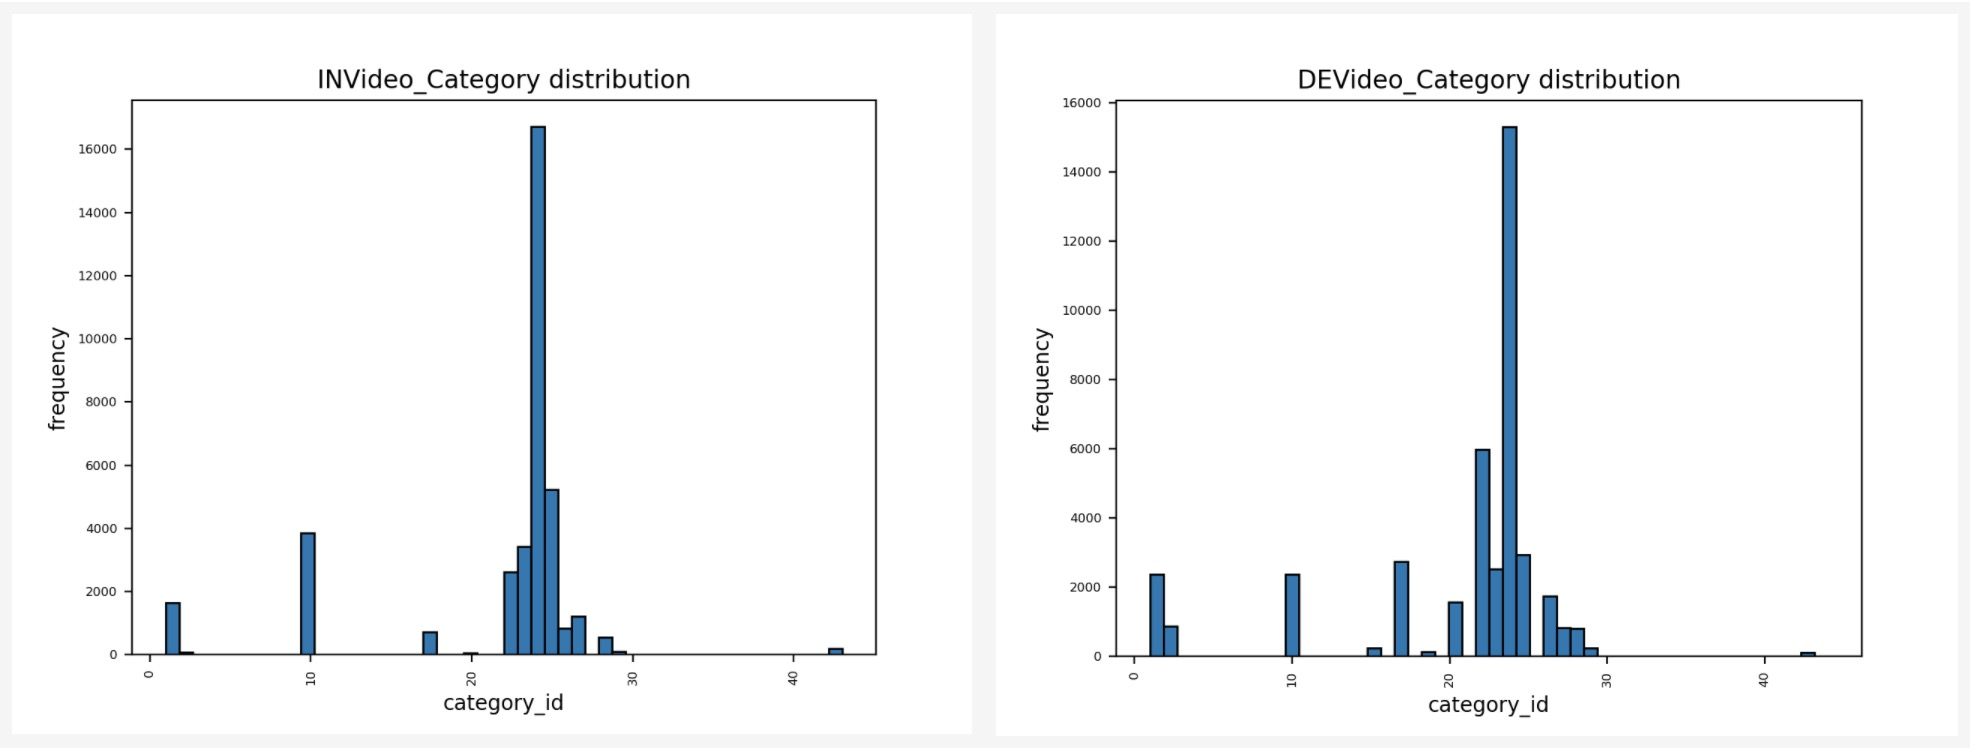

In [4]:
from IPython.display import Image, display
display(Image(filename = 'com_hist1.png'))
display(Image(filename = 'com_hist2.png'))

<p>2.1.2 数值属性，给出数值属性的五数概括及缺失值的个数
    <p>该数据集中数值属性有：views、likes、dislikes、comment_count
    <p>** Name: views, dtype: float64**

In [ ]:
#views数值属性五数概括
np.set_printoptions(suppress=True)
print(USvideo['views'].dropna().astype(int).describe())
print(CAvideo['views'].dropna().astype(int).describe())
print(INvideo['views'].dropna().astype(int).describe())
print(DEvideo['views'].dropna().astype(int).describe())

| US-views   |            |   | CA-views   |            |   | IN-views   |            |   | DE-views   |            | 
| :-----: | :-----: |         | :-----: | :-----: |         | :-----: | :-----: |         | :-----: | :-----: |       
| count      |    40949.00|   | count      |    40881.00|   | count      |    37352.00|   | count      |    40840.00| 
| mean       |  2360785.00|   | mean       |  1147036.00|   | mean       |  1060478.00|   | mean       |   603455.30| 
| std        |  7394114.00|   | std        |  3390913.00|   | std        |  3184932.00|   | std        |  2348963.00|
| min        |      549.00|   | min        |      733.00|   | min        |     4024.00|   | min        |      518.00|
| 25%        |   242329.00|   | 25%        |   143902.00|   | 25%        |   123915.50|   | 25%        |    27068.75|
| 50%        |   681861.00|   | 50%        |   371204.00|   | 50%        |   304586.00|   | 50%        |   119277.00|
| 75%        |  1823157.00|   | 75%        |   963302.00|   | 75%        |   799291.20|   | 75%        |   443101.50|
| max        |182315700.00|   | max        |137843100.00|   | max        |125432200.00|   | max        |113876200.00| 

<p>** Name: likes, dtype: float64**

In [ ]:
#likes数值属性五数概括
np.set_printoptions(suppress=True)
print(USvideo['likes'].dropna().astype(int).describe())
print(CAvideo['likes'].dropna().astype(int).describe())
print(INvideo['likes'].dropna().astype(int).describe())
print(DEvideo['likes'].dropna().astype(int).describe())

| US-views   |            |   | CA-views   |            |   | IN-views   |            |   | DE-views   |            | 
| :-----: | :-----: |         | :-----: | :-----: |         | :-----: | :-----: |         | :-----: | :-----: |       
| count      |4.094900e+04|   | count      |4.088100e+04|   | count      |3.735200e+04|   | count      |4.084000e+04| 
| mean       |7.426670e+04|   | mean       |3.958269e+04|   | mean       |2.708272e+04|   | mean       |2.187550e+04| 
| std        |2.288853e+05|   | std        |1.326895e+05|   | std        |9.714510e+04|   | std        |1.018000e+05|
| min        |0.000000e+00|   | min        |0.000000e+00|   | min        |0.000000e+00|   | min        |0.000000e+00|
| 25%        |5.424000e+03|   | 25%        |2.191000e+03|   | 25%        |8.640000e+02|   | 25%        |5.330000e+02|
| 50%        |1.809100e+04|   | 50%        |8.780000e+03|   | 50%        |3.069000e+03|   | 50%        |2.699000e+03|
| 75%        |5.541700e+04|   | 75%        |2.871700e+04|   | 75%        |1.377425e+04|   | 75%        |1.179625e+04|
| max        |5.613827e+06|   | max        |5.053338e+06|   | max        |2.912710e+06|   | max        |4.924056e+06| 

<p>** Name: dislikes, dtype: float64**

In [ ]:
#dislikes数值属性五数概括
np.set_printoptions(suppress=True)
print(USvideo['dislikes'].dropna().astype(int).describe())
print(CAvideo['dislikes'].dropna().astype(int).describe())
print(INvideo['dislikes'].dropna().astype(int).describe())
print(DEvideo['dislikes'].dropna().astype(int).describe())

| US-views   |            |   | CA-views   |            |   | IN-views   |            |   | DE-views   |            | 
| :-----: | :-----: |         | :-----: | :-----: |         | :-----: | :-----: |         | :-----: | :-----: |       
| count      |4.094900e+04|   | count      |4.088100e+04|   | count      |3.735200e+04|   | count      |4.084000e+04| 
| mean       |3.711401e+03|   | mean       |2.009195e+03|   | mean       |1.665082e+03|   | mean       |1.397136e+03| 
| std        |2.902971e+04|   | std        |1.900837e+04|   | std        |1.607617e+04|   | std        |1.457738e+04|
| min        |0.000000e+00|   | min        |0.000000e+00|   | min        |0.000000e+00|   | min        |0.000000e+00|
| 25%        |2.020000e+02|   | 25%        |9.900000e+01|   | 25%        |1.080000e+02|   | 25%        |2.900000e+01|
| 50%        |6.310000e+02|   | 50%        |3.030000e+02|   | 50%        |3.260000e+02|   | 50%        |1.340000e+02|
| 75%        |1.938000e+03|   | 75%        |9.500000e+02|   | 75%        |1.019250e+03|   | 75%        |5.320000e+02|
| max        |1.674420e+06|   | max        |1.602383e+06|   | max        |1.545017e+06|   | max        |1.470386e+06| 

<p>** Name: comment_count, dtype: float64**

In [ ]:
#comment_count数值属性五数概括
np.set_printoptions(suppress=True)
print(USvideo['comment_count'].dropna().astype(int).describe())
print(CAvideo['comment_count'].dropna().astype(int).describe())
print(INvideo['comment_count'].dropna().astype(int).describe())
print(DEvideo['comment_count'].dropna().astype(int).describe())

| US-views   |            |   | CA-views   |            |   | IN-views   |            |   | DE-views   |            | 
| :-----: | :-----: |         | :-----: | :-----: |         | :-----: | :-----: |         | :-----: | :-----: |       
| count      |4.094900e+04|   | count      |4.088100e+04|   | count      | 37352.00000|   | count      |4.084000e+04| 
| mean       |8.446804e+03|   | mean       |5.042975e+03|   | mean       |  2676.99743|   | mean       |2.785857e+03| 
| std        |3.743049e+04|   | std        |2.157902e+04|   | std        | 14868.31713|   | std        |1.745803e+04|
| min        |0.000000e+00|   | min        |0.000000e+00|   | min        |     0.00000|   | min        |0.000000e+00|
| 25%        |6.140000e+02|   | 25%        |4.170000e+02|   | 25%        |    81.00000|   | 25%        |7.900000e+01|
| 50%        |1.856000e+03|   | 50%        |1.301000e+03|   | 50%        |   329.00000|   | 50%        |3.760000e+02|
| 75%        |5.755000e+03|   | 75%        |3.713000e+03|   | 75%        |  1285.00000|   | 75%        |1.376000e+03|
| max        |1.361580e+06|   | max        |1.114800e+06|   | max        |827755.00000|   | max        |1.084435e+06| 

<p>各数据集的缺省值情况为 

| US-video缺失值 |  |         | CA-video缺失值 | |          | IN-video缺失值 | |          | DE-video缺失值 | |
| :----: | :----: |          | :----: | :----: |          | :----: | :----: |          | :----: | :----: |             
| video_id     | 0 |         | video_id     | 0 |         | video_id     | 0 |         | video_id     | 0 |     
| trending_date| 0 |         | trending_date| 0 |         | trending_date| 0 |         | trending_date| 0 |   
| title        | 0 |         | title        | 0 |         | title        | 0 |         | title        | 0 |
| channel_title| 0 |         | channel_title| 0 |         | channel_title| 0 |         | channel_title| 0 |
| category_id  | 0 |         | category_id  | 0 |         | category_id  | 0 |         | category_id  | 0 |
| publish_time | 0 |         | publish_time | 0 |         | publish_time | 0 |         | publish_time | 0 |
| tags         | 0 |         | tags         | 0 |         | tags         | 0 |         | tags         | 0 |
| views        | 0 |         | views        | 0 |         | views        | 0 |         | views        | 0 |
| likes        | 0 |         | likes        | 0 |         | likes        | 0 |         | likes        | 0 |
| dislikes     | 0 |         | dislikes     | 0 |         | dislikes     | 0 |         |dislikes      | 0 |
| comment_count| 0 |         | comment_count| 0 |         | comment_count| 0 |         | comment_count| 0 |
| thumbnail_link| 0 |        | thumbnail_link| 0 |        | thumbnail_link| 0 |        | thumbnail_link| 0 |
| comments_disabled| 0 |     | comments_disabled| 0 |     | comments_disabled| 0 |     | comments_disabled| 0 |
| ratings_disabled| 0 |      | ratings_disabled| 0 |      | ratings_disabled| 0 |      | ratings_disabled| 0 |
| video_error_or_removed| 0 || video_error_or_removed| 0 || video_error_or_removed| 0 || video_error_or_removed| 0 |
| description| 570 |         | description| 1296 |         | description| 561 |         | description| 1552 |        

<p>** 根据上述缺省值情况，description缺失值填写后的数据可视化展示有问题，所以这里就不做展示了 

\* 数据可视化
<p>2.1.3 使用直方图、盒图等检查数据分布及离群点 
<p>（这里给出views、likes属性的可视化展示）
<p>(1)、** views直方图 **

In [ ]:
#views直方图
plt.hist(USvideo['views'].dropna().astype(int), bins=50)
# 添加x轴和y轴标签
plt.xlabel('views')
plt.ylabel('frequency')
# 添加标题
plt.title('US-views_distribution')
plt.savefig('./videoResult/US/USviews_hist.png')
plt.show()

plt.hist(CAvideo['views'].dropna().astype(int), bins=50)
# 添加x轴和y轴标签
plt.xlabel('views')
plt.ylabel('frequency')
# 添加标题
plt.title('CA-views_distribution')
plt.savefig('./videoResult/CA/CAviews_hist.png')
plt.show()

plt.hist(INvideo['views'].dropna().astype(int), bins=50)
# 添加x轴和y轴标签
plt.xlabel('views')
plt.ylabel('frequency')
# 添加标题
plt.title('IN-views_distribution')
plt.savefig('./videoResult/IN/INviews_hist.png')
plt.show()

plt.hist(DEvideo['views'].dropna().astype(int), bins=50)
# 添加x轴和y轴标签
plt.xlabel('views')
plt.ylabel('frequency')
# 添加标题
plt.title('DE-views_distribution')
plt.savefig('./videoResult/DE/DEviews_hist.png')
plt.show()

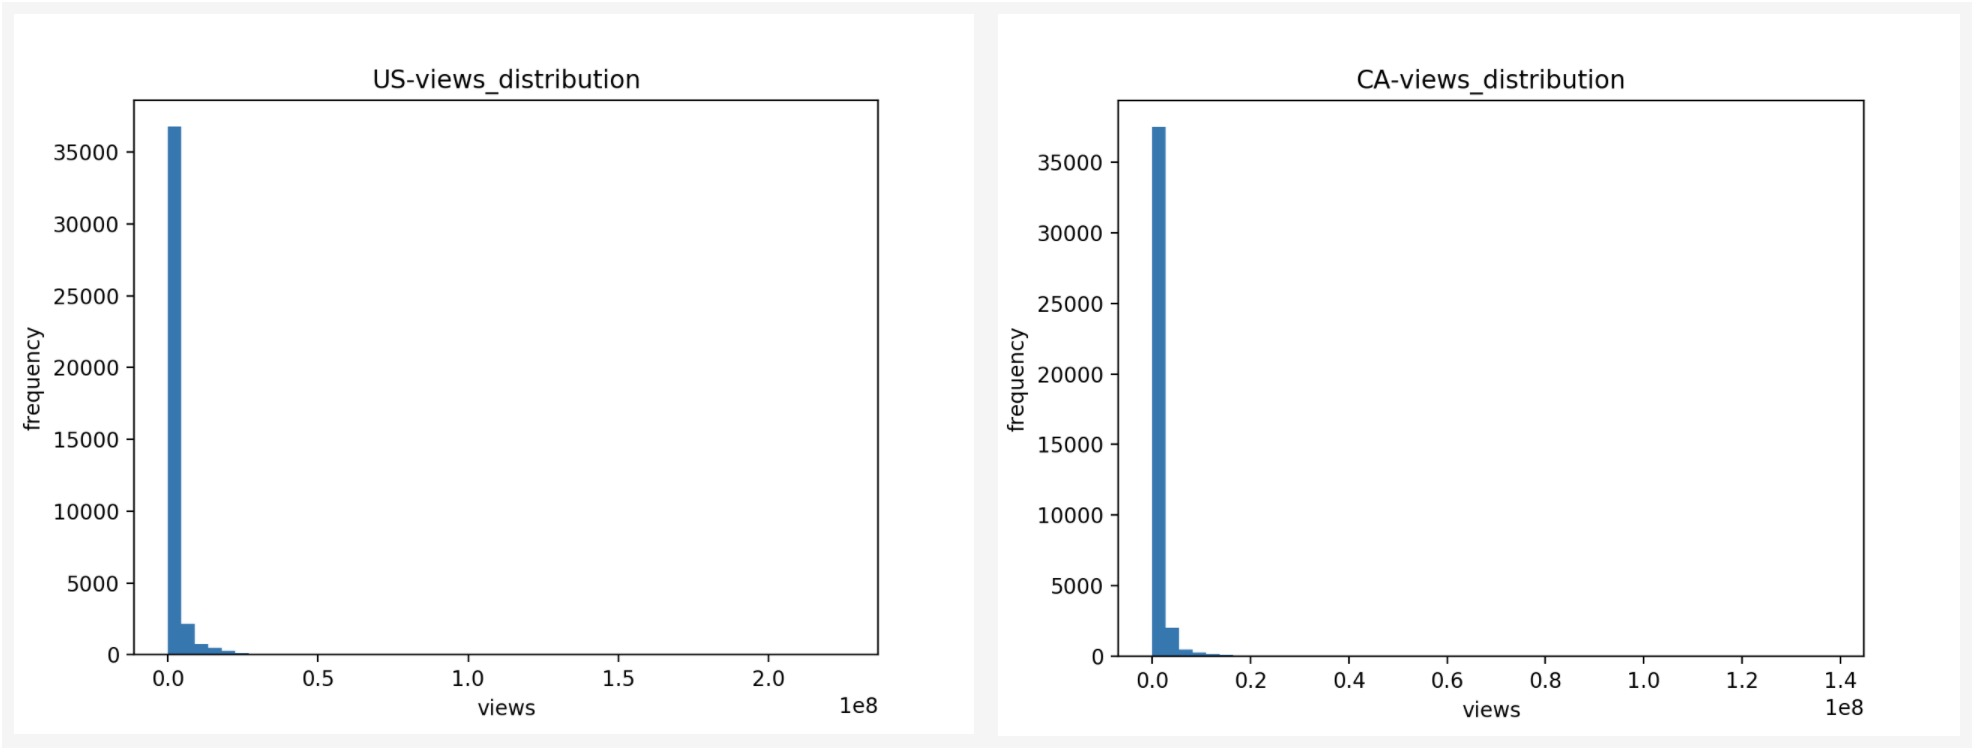

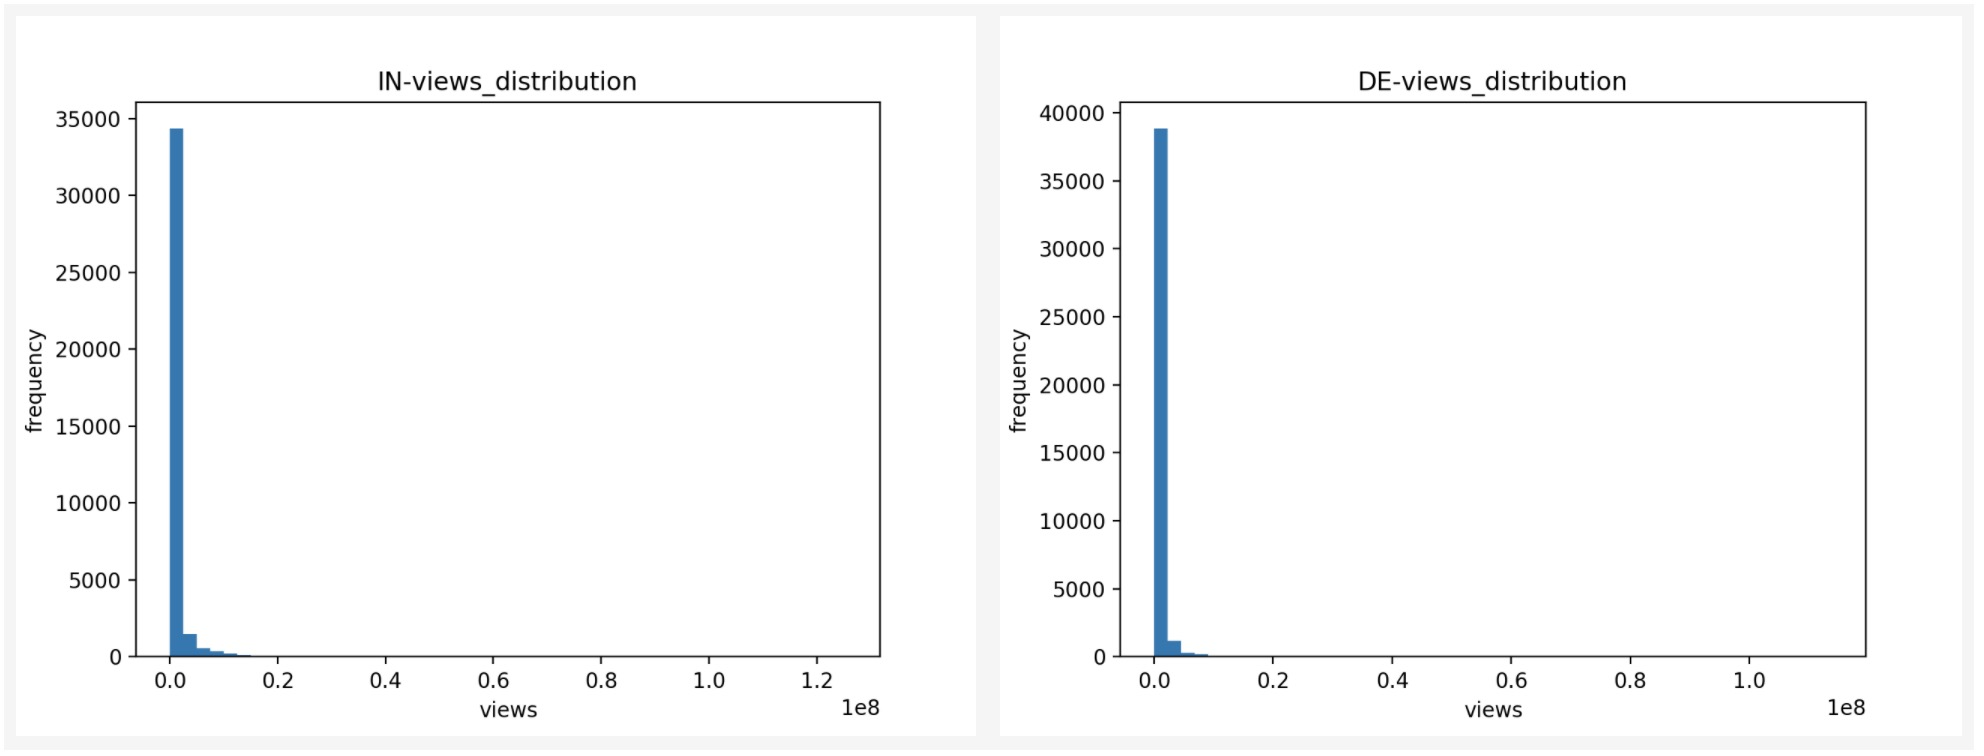

In [6]:
from IPython.display import Image,display
display(Image(filename = 'viewNew_hist1.png'))
display(Image(filename = 'viewNew_hist2.png'))

<p>** likes直方图 **

In [ ]:
#likes直方图
plt.hist(USvideo['likes'].dropna().astype(int), bins=50)
# 添加x轴和y轴标签
plt.xlabel('likes')
plt.ylabel('frequency')
# 添加标题
plt.title('US-likes_distribution')
plt.savefig('./videoResult/US/USlikes_hist.png')
plt.show()

plt.hist(CAvideo['likes'].dropna().astype(int), bins=50)
# 添加x轴和y轴标签
plt.xlabel('likes')
plt.ylabel('frequency')
# 添加标题
plt.title('CA-likes_distribution')
plt.savefig('./videoResult/CA/CAlikes_hist.png')
plt.show()

plt.hist(INvideo['likes'].dropna().astype(int), bins=50)
# 添加x轴和y轴标签
plt.xlabel('likes')
plt.ylabel('frequency')
# 添加标题
plt.title('IN-likes_distribution')
plt.savefig('./videoResult/IN/INlikes_hist.png')
plt.show()

plt.hist(DEvideo['likes'].dropna().astype(int), bins=50)
# 添加x轴和y轴标签
plt.xlabel('likes')
plt.ylabel('frequency')
# 添加标题
plt.title('DE-likes_distribution')
plt.savefig('./videoResult/DE/DElikes_hist.png')
plt.show()

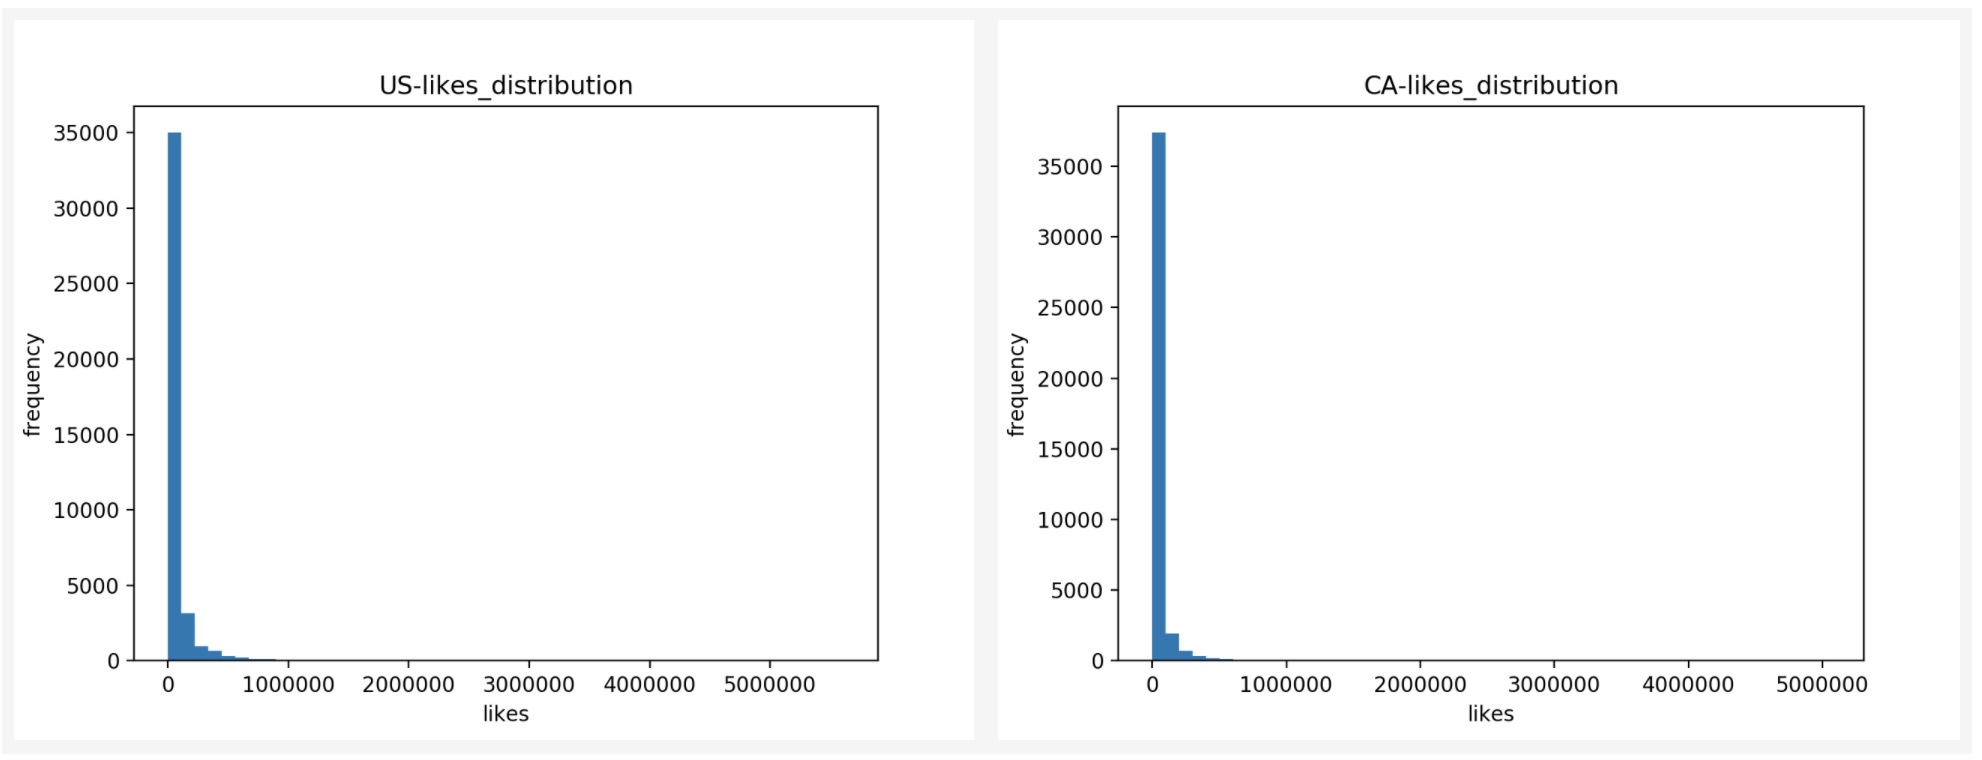

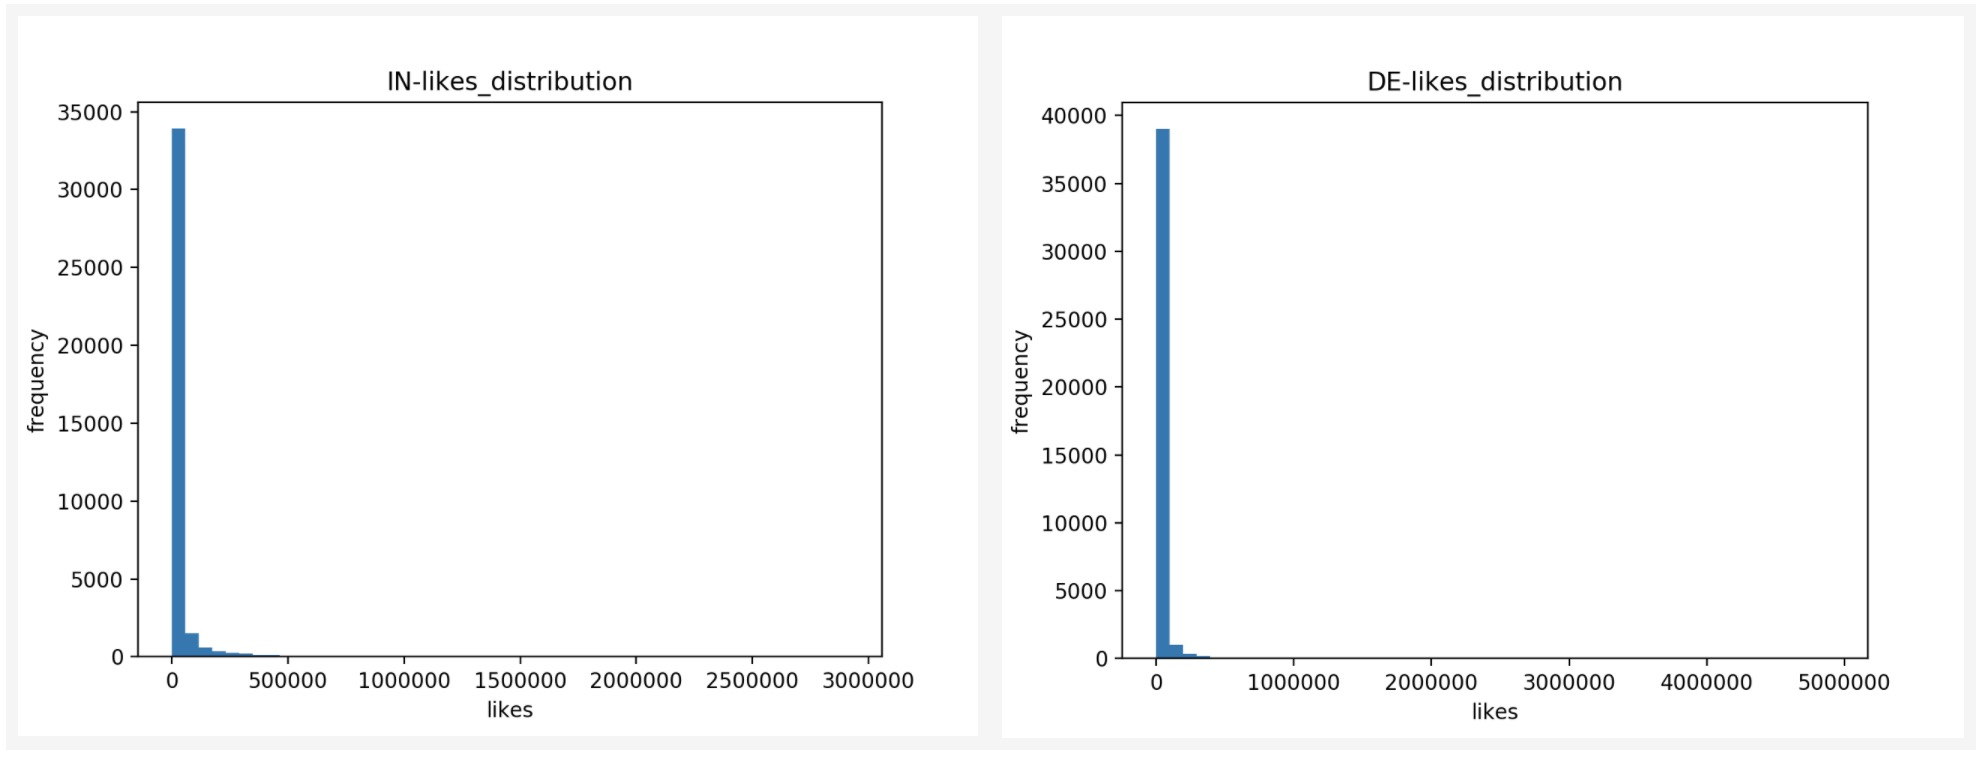

In [8]:
from IPython.display import Image, display
display(Image(filename = 'likeNew_hist1.png'))
display(Image(filename = 'likeNew_hist2.png'))

<p>(2)、** views盒图 **

In [ ]:
#views属性盒图
plt.boxplot(USvideo['views'].dropna().astype(int))
plt.ylabel('views')
plt.title('US-views_Boxplot')
plt.savefig('./videoResult/US/USviews_box.png')
plt.show()

plt.boxplot(CAvideo['views'].dropna().astype(int))
plt.ylabel('views')
plt.title('CA-views_Boxplot')
plt.savefig('./videoResult/CA/CAviews_box.png')
plt.show()

plt.boxplot(INvideo['views'].dropna().astype(int))
plt.ylabel('views')
plt.title('IN-views_Boxplot')
plt.savefig('./videoResult/IN/INviews_box.png')
plt.show()

plt.boxplot(DEvideo['views'].dropna().astype(int))
plt.ylabel('views')
plt.title('DE-views_Boxplot')
plt.savefig('./videoResult/DE/DEviews_box.png')
plt.show()

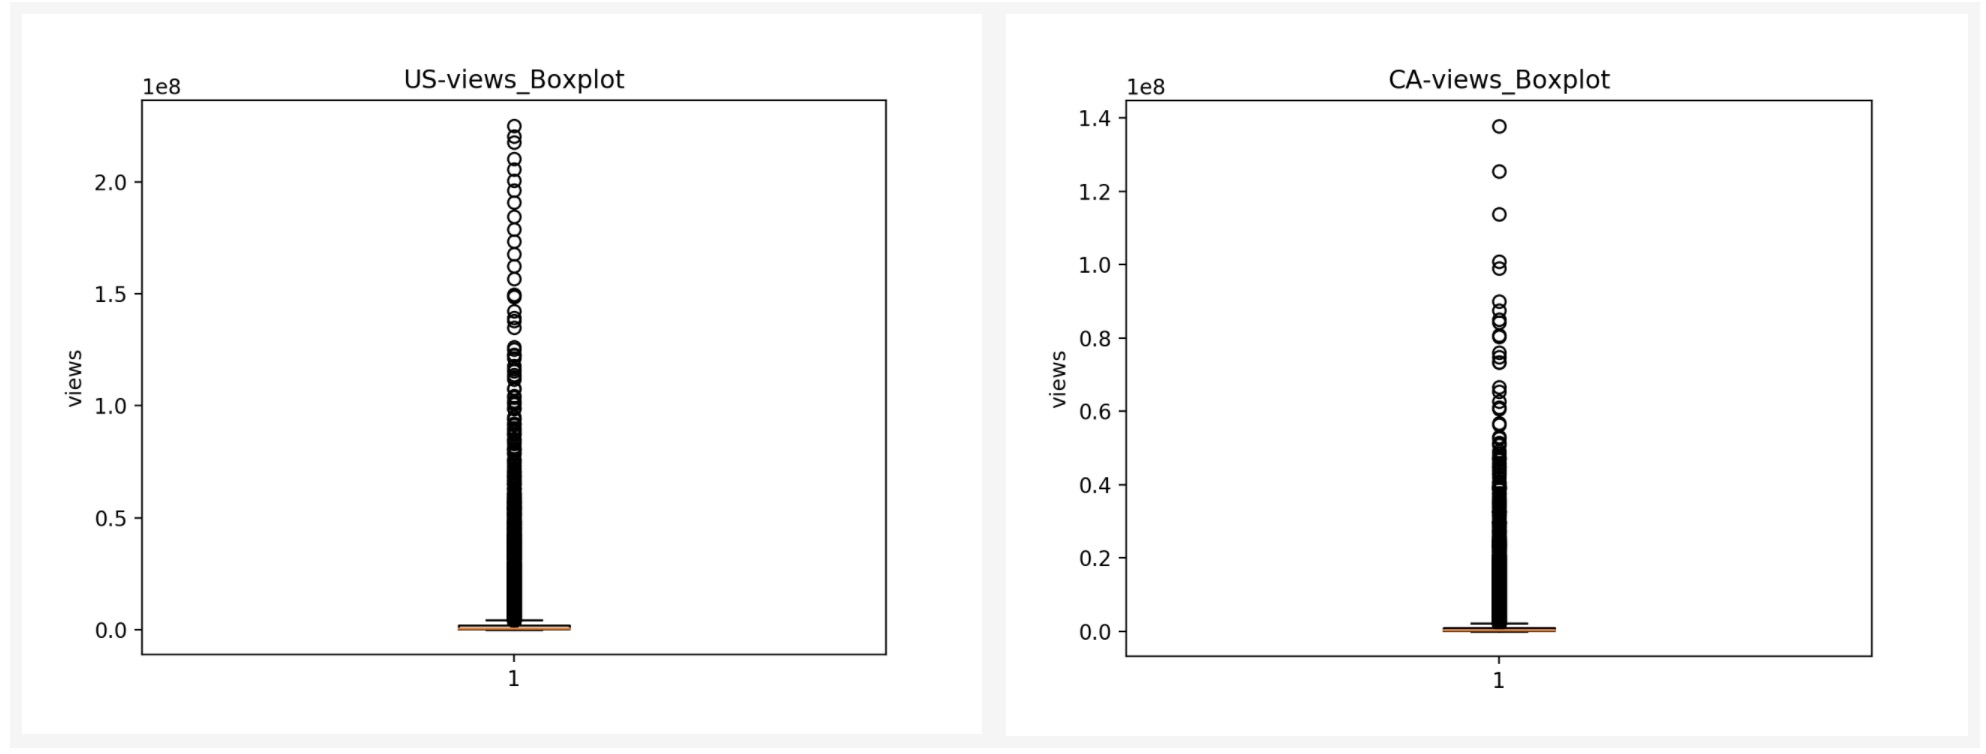

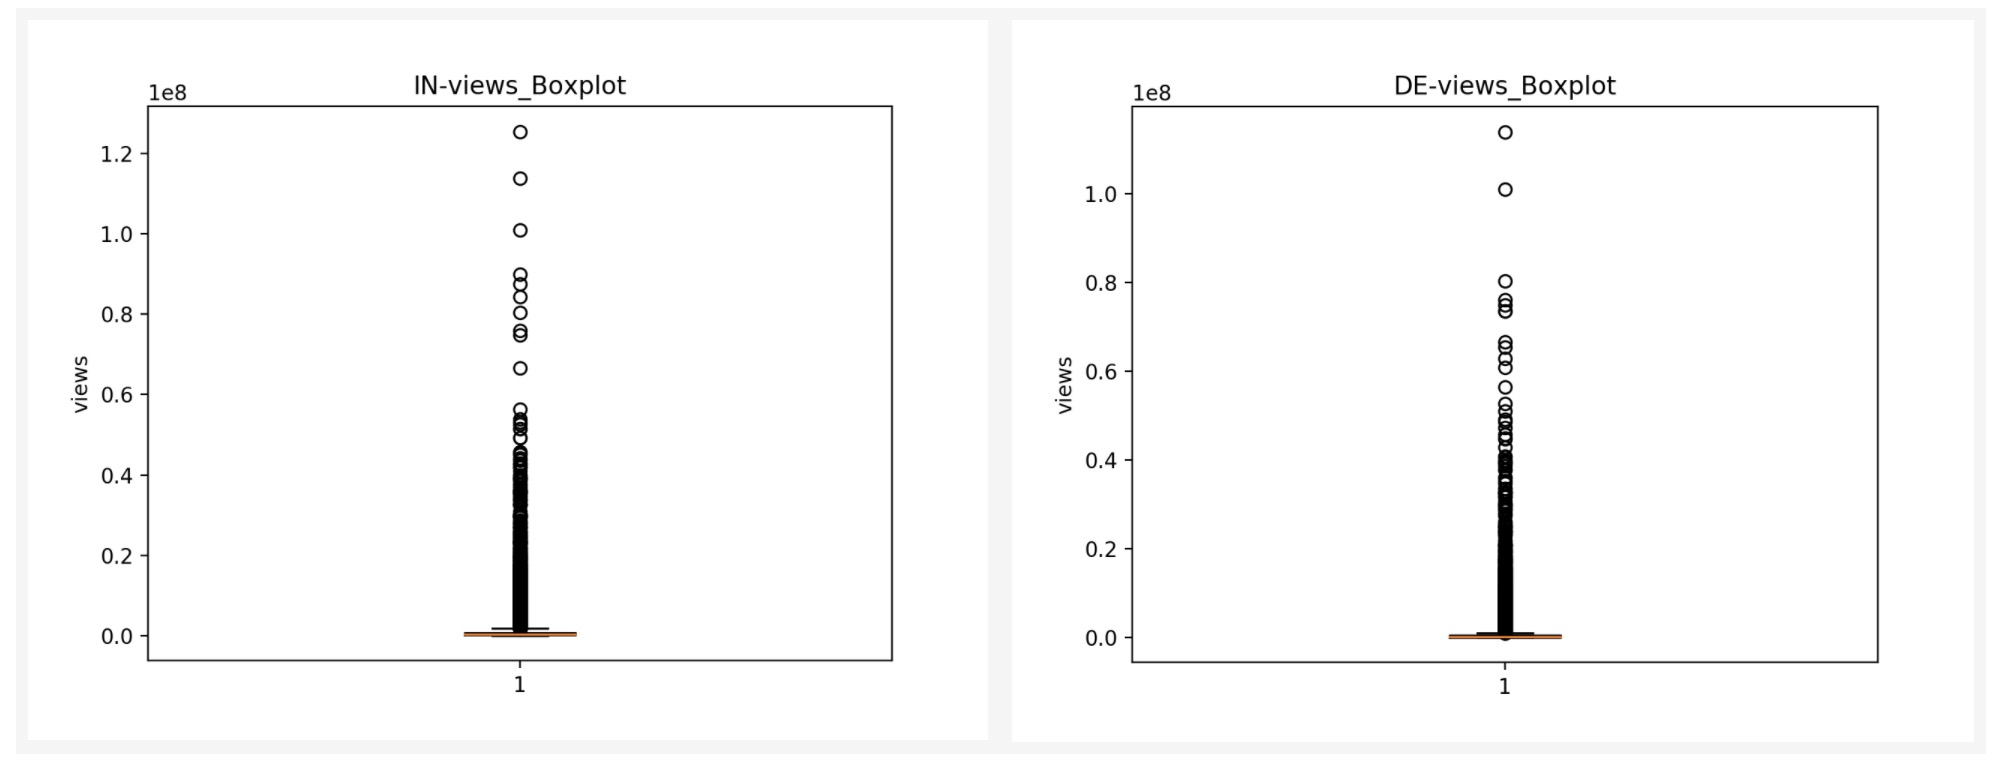

In [10]:
from IPython.display import Image, display
display(Image(filename = 'viewNew_box.png'))
display(Image(filename = 'viewNew_box1.png'))

<p>** likes盒图 **

In [ ]:
#likes属性盒图
plt.boxplot(USvideo['likes'].dropna().astype(int))
plt.ylabel('likes')
plt.title('US-likes_Boxplot')
plt.savefig('./videoResult/US/USlikes_box.png')
plt.show()

plt.boxplot(CAvideo['likes'].dropna().astype(int))
plt.ylabel('likes')
plt.title('CA-likes_Boxplot')
plt.savefig('./videoResult/CA/CAlikes_box.png')
plt.show()

plt.boxplot(INvideo['likes'].dropna().astype(int))
plt.ylabel('likes')
plt.title('IN-likes_Boxplot')
plt.savefig('./videoResult/IN/INlikes_box.png')
plt.show()

plt.boxplot(DEvideo['likes'].dropna().astype(int))
plt.ylabel('likes')
plt.title('DE-likes_Boxplot')
plt.savefig('./videoResult/DE/DElikes_box.png')
plt.show()

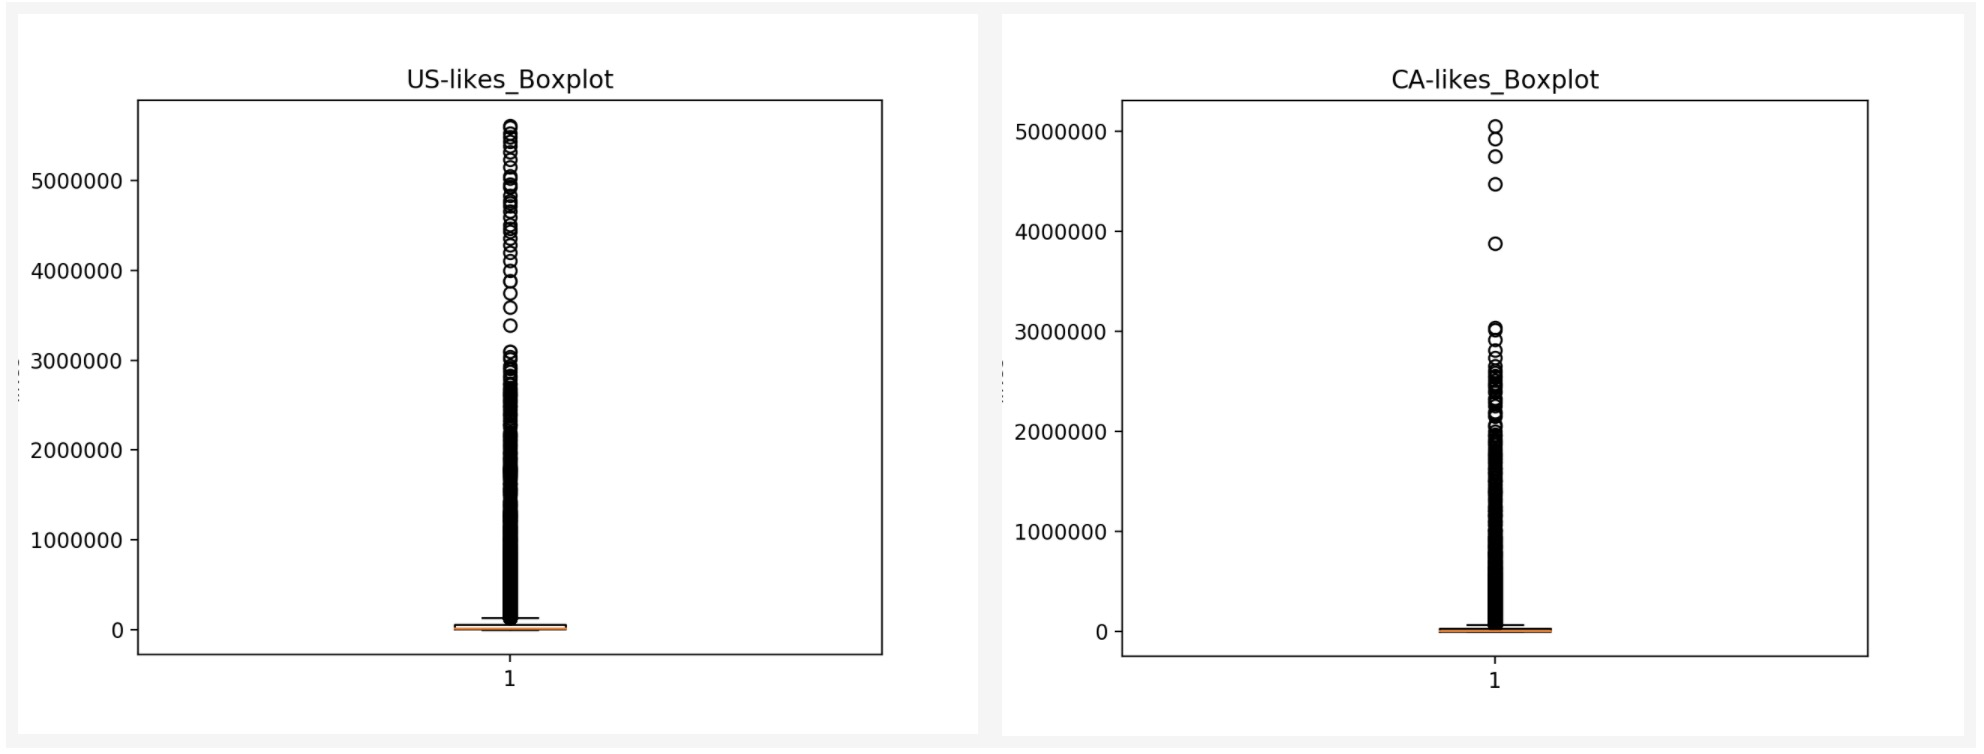

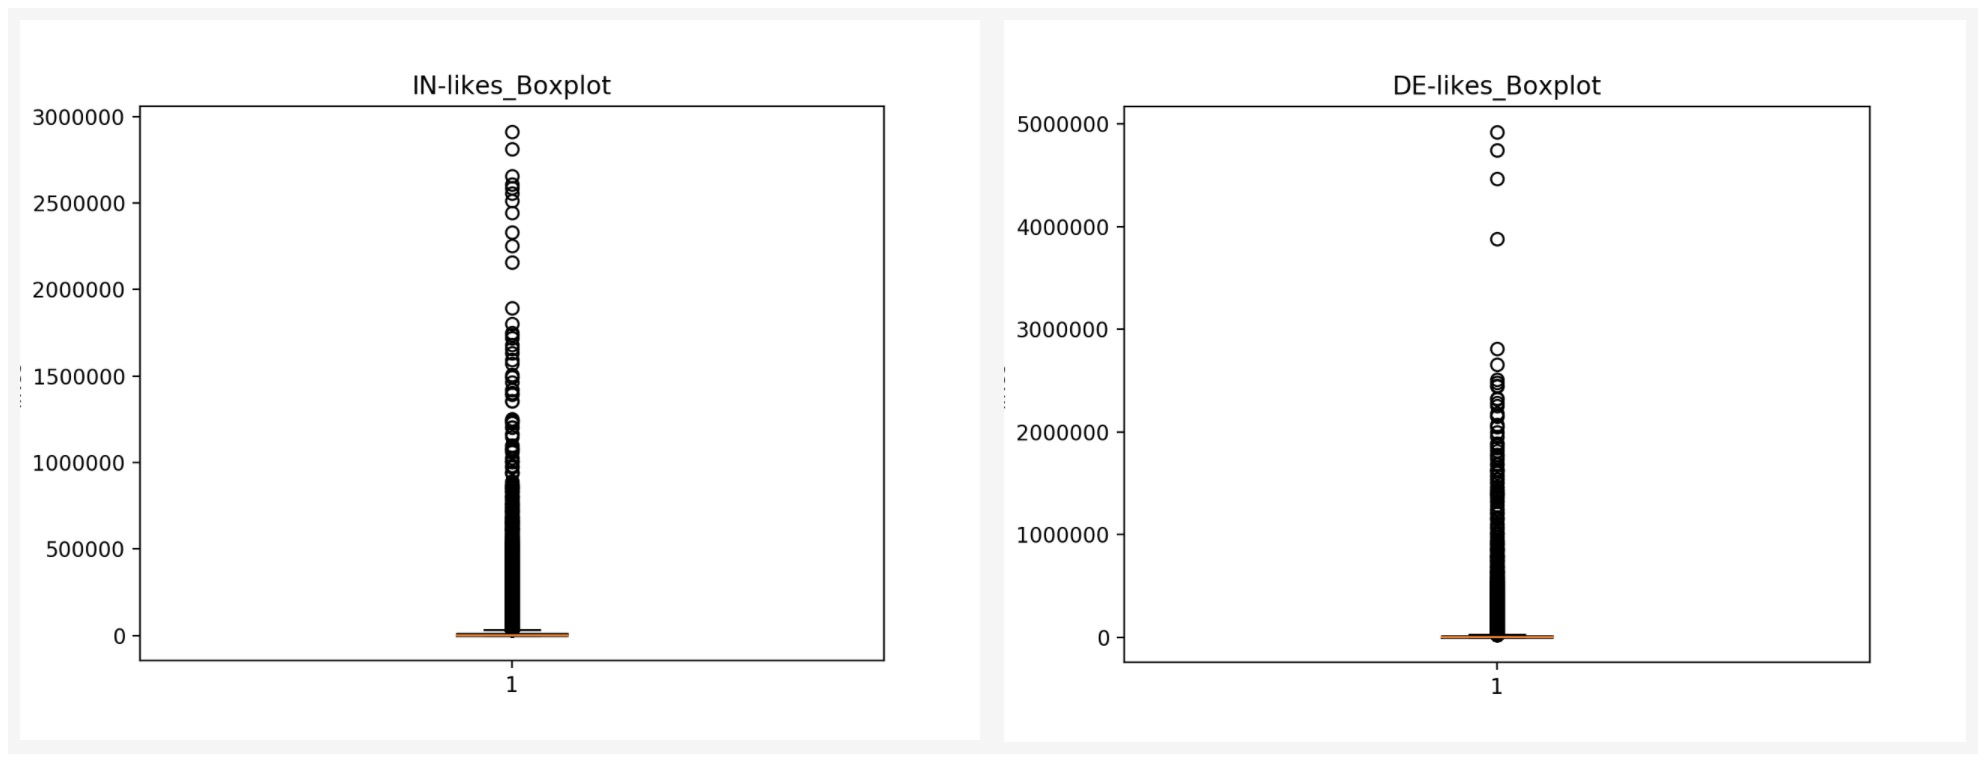

In [40]:
from IPython.display import Image, display, HTML
display(Image(filename = 'likeNew_box1.png'))
display(Image(filename = 'likeNew_box2.png'))

<p>(3)、** viewsQ-Q图 **

In [ ]:
#views属性Q-Q图
sorted_ = np.sort(USvideo['views'].dropna().astype(int))
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(USvideo['views'].dropna().astype(int), dist="norm", plot=plt)
plt.title('US-views Q-Q')
plt.savefig('./videoResult/US/USviews_qq.png')
plt.show()

sorted_ = np.sort(CAvideo['views'].dropna().astype(int))
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(CAvideo['views'].dropna().astype(int), dist="norm", plot=plt)
plt.title('CA-views Q-Q')
plt.savefig('./videoResult/CA/CAviews_qq.png')
plt.show()

sorted_ = np.sort(INvideo['views'].dropna().astype(int))
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(INvideo['views'].dropna().astype(int), dist="norm", plot=plt)
plt.title('IN-views Q-Q')
plt.savefig('./videoResult/IN/INviews_qq.png')
plt.show()

sorted_ = np.sort(DEvideo['views'].dropna().astype(int))
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(DEvideo['views'].dropna().astype(int), dist="norm", plot=plt)
plt.title('DE-views Q-Q')
plt.savefig('./videoResult/DE/DEviews_qq.png')
plt.show()

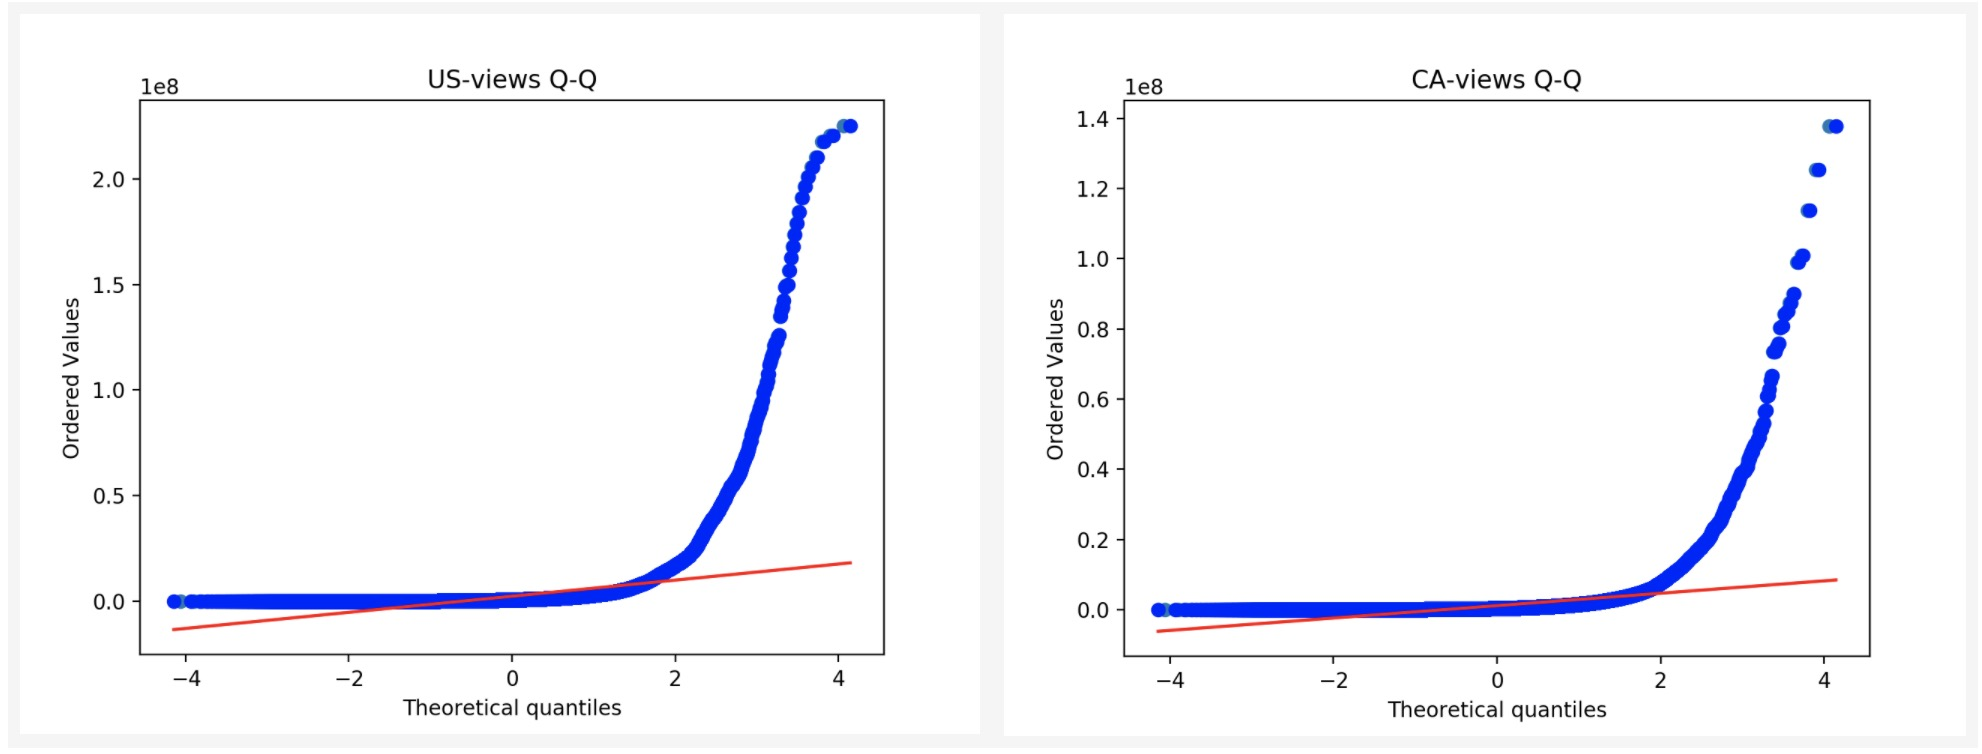

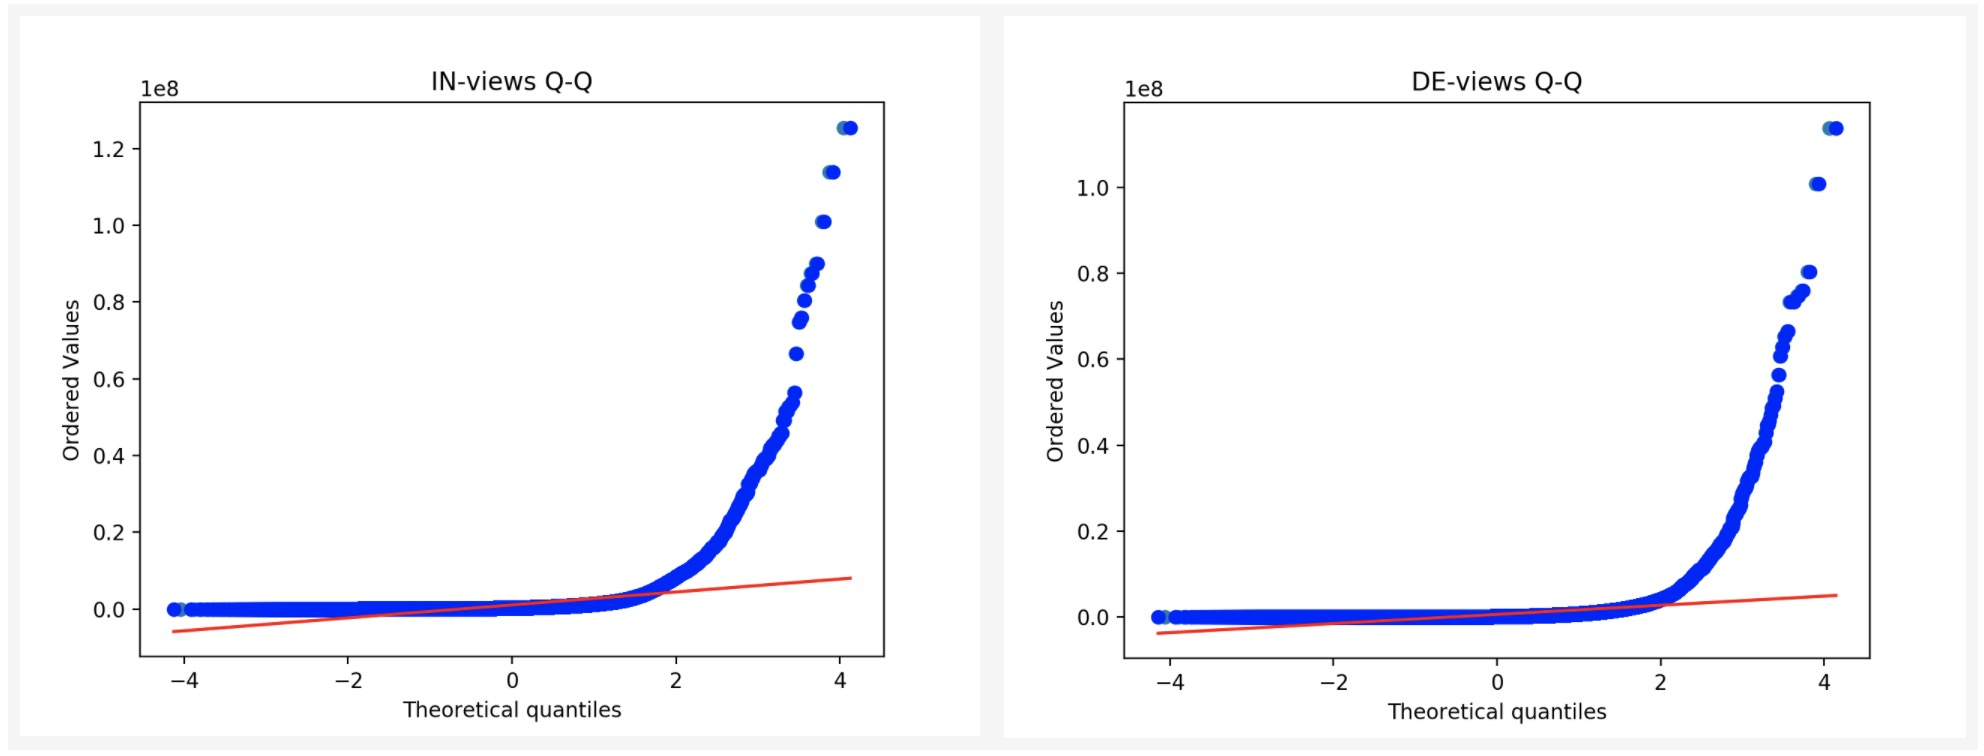

In [43]:
from IPython.display import Image, display, HTML
display(Image(filename = 'viewNew_qq.png'))
display(Image(filename = 'viewNew_qq1.png'))

<p>** likesQ-Q图 **

In [ ]:
#likes属性Q-Q图
sorted_ = np.sort(USvideo['likes'].dropna().astype(int))
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(USvideo['likes'].dropna().astype(int), dist="norm", plot=plt)
plt.title('US-likes Q-Q')
plt.savefig('./videoResult/US/USlikes_qq.png')
plt.show()

sorted_ = np.sort(CAvideo['likes'].dropna().astype(int))
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(CAvideo['likes'].dropna().astype(int), dist="norm", plot=plt)
plt.title('CA-likes Q-Q')
plt.savefig('./videoResult/CA/CAlikes_qq.png')
plt.show()

sorted_ = np.sort(INvideo['likes'].dropna().astype(int))
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(INvideo['likes'].dropna().astype(int), dist="norm", plot=plt)
plt.title('IN-likes Q-Q')
plt.savefig('./videoResult/IN/INlikes_qq.png')
plt.show()

sorted_ = np.sort(DEvideo['likes'].dropna().astype(int))
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(DEvideo['likes'].dropna().astype(int), dist="norm", plot=plt)
plt.title('DE-likes Q-Q')
plt.savefig('./videoResult/DE/DElikes_qq.png')
plt.show()

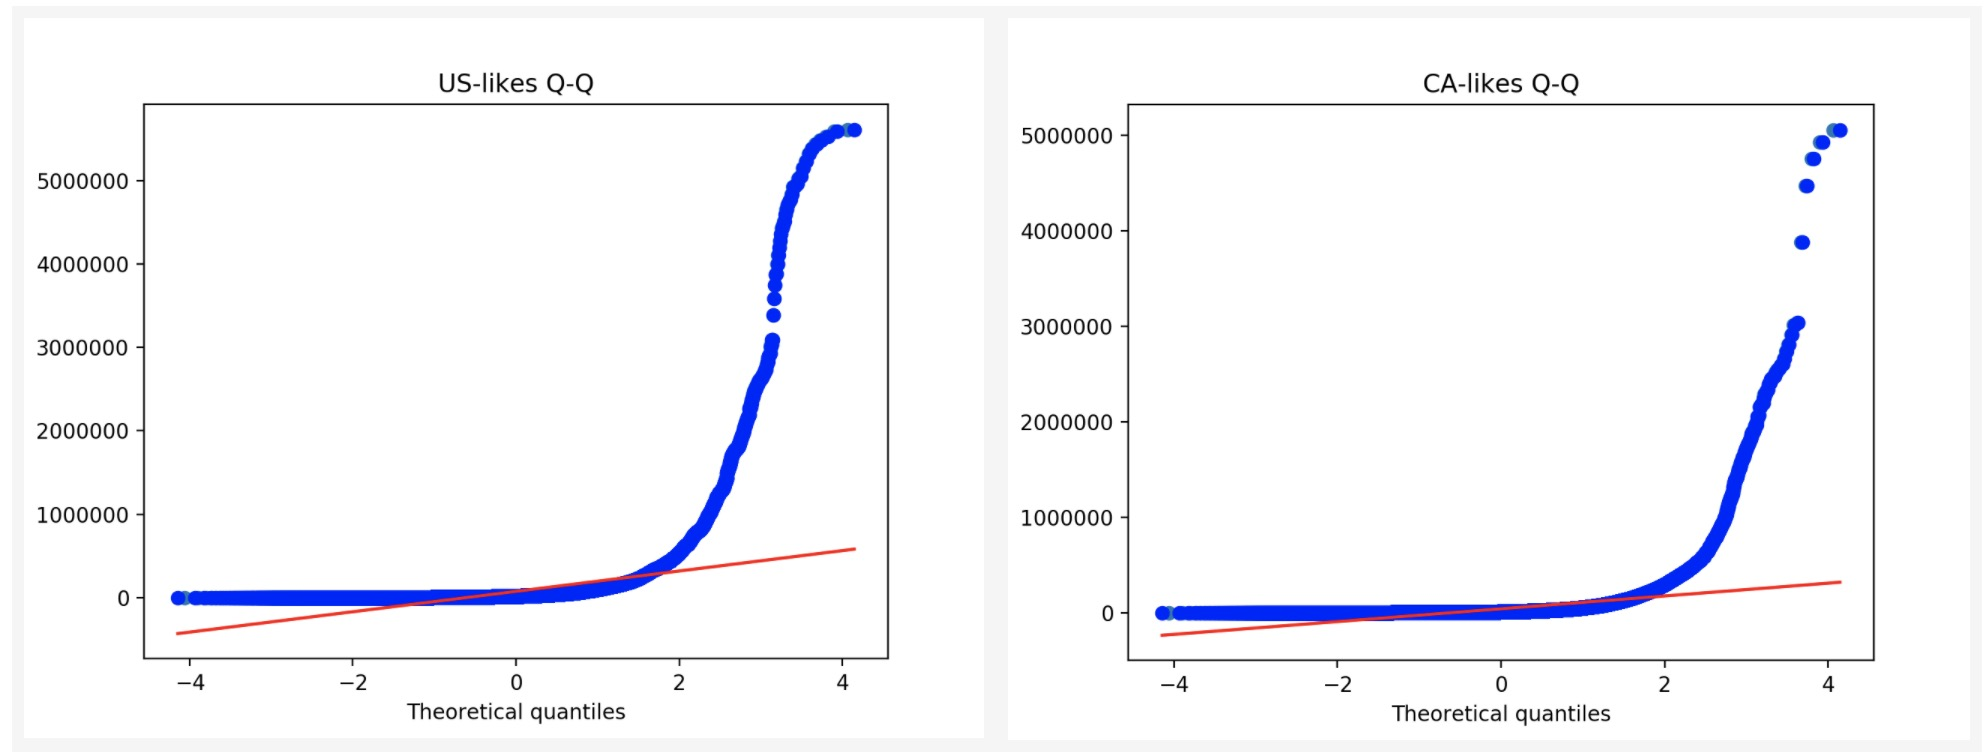

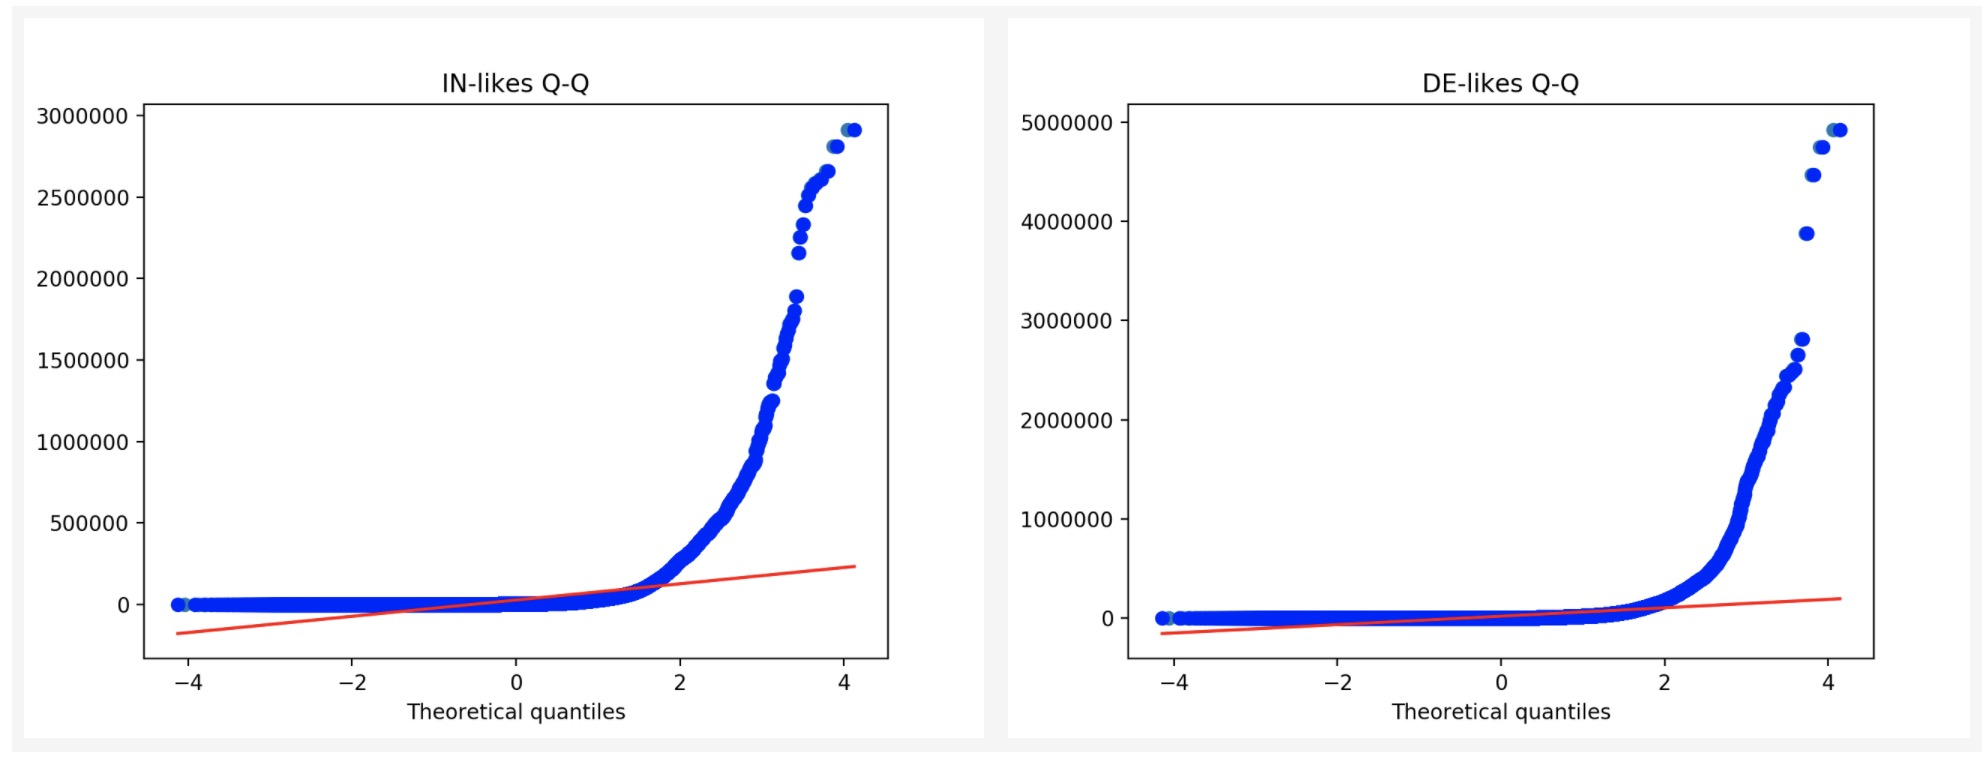

In [45]:
from IPython.display import Image, display, HTML
display(Image(filename = 'likeNew_qq.png'))
display(Image(filename = 'likeNew_qq1.png'))